# <center><font size = '10' color = 'crimson'>Solar Radiation Estimation: Togo<font/><center/>


## **Overview**

## <font color = 'green'>Business Objective<font/>



MoonLight Energy Solutions aims to develop a strategic approach to significantly enhance its operational efficiency and sustainability through targeted solar investments. As an Analytics Engineer at MoonLight Energy Solutions, your task is to perform a quick analysis of an environmental measurement provided by the engineering team and translate your observation as a strategy report. Your analysis should focus on identifying key trends and learn valuable insights that will support your data-driven case - your recommendation based on the statistical analysis and EDA.  In particular, your analysis and recommendation must present a strategy focusing on identifying high-potential regions for solar installation that align with the company's long-term sustainability goals. Your report should provide an insight to help realize the overarching objectives of MoonLight Energy Solutions.

## <font color = 'green'>Dataset Overview<font/>



### Solar Radiation Measurement Data

The data for this week's challenge is extracted and aggregated from Solar Radiation Measurement Data. Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

The structure of the data is as follows:

- **Timestamp (yyyy-mm-dd hh:mm)**: Date and time of each observation.
- **GHI (W/m²)**: Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
- **DNI (W/m²)**: Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
- **DHI (W/m²)**: Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
- **ModA (W/m²)**: Measurements from a module or sensor (A), similar to irradiance.
- **ModB (W/m²)**: Measurements from a module or sensor (B), similar to irradiance.
- **Tamb (°C)**: Ambient Temperature in degrees Celsius.
- **RH (%)**: Relative Humidity as a percentage of moisture in the air.
- **WS (m/s)**: Wind Speed in meters per second.
- **WSgust (m/s)**: Maximum Wind Gust Speed in meters per second.
- **WSstdev (m/s)**: Standard Deviation of Wind Speed, indicating variability.
- **WD (°N (to east))**: Wind Direction in degrees from north.
WDstdev: Standard Deviation of Wind Direction, showing directional variability.
- **BP (hPa)**: Barometric Pressure in hectopascals.
- **Cleaning (1 or 0)**: Signifying whether cleaning (possibly of the modules or sensors) occurred.
- **Precipitation (mm/min)**: Precipitation rate measured in millimeters per minute.
- **TModA (°C)**: Temperature of Module A in degrees Celsius.
- **TModB (°C)**: Temperature of Module B in degrees Celsius.
- **Comments**: This column is designed for any additional notes.

# Observations:
- data was recorded every second. it is a year long data.


# <font color = 'green'>Importing Libraries<font/><a class = 'anchor' id = 'import'/>

In [9]:
import random
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# <font color = 'violet'>Loading Data<font/><a class = 'anchor' id = 'load_data'/>

In [10]:
DATA_PATH = "C:/dev/Side-Projects/10 Acadamy/Week 0 Challenge/Solar-Radiation-Estimation/data/togo-dapaong_qc.csv"

In [11]:
# Load Togo data
df_tg = pd.read_csv(DATA_PATH, index_col="Timestamp", parse_dates=True)
df_tg.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-10-25 00:01:00      0.4  227.6      1.1  977         0            0.0   
2021-10-25 00:02:00      0.4  229.3      0.7  977         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-10-25 00:01:00   24.7   24.4       NaN  
2021-10-25 00:02:00   24.7   24.4       NaN

# <font color = 'violet'>Understanding the Data<font/><a class = 'anchor' id = 'load_data'/>

In [12]:
print("Shape of Togo dataframe:", df_tg.shape)

Shape of Togo dataframe: (525600, 18)


In [13]:
# Info about df_tg: data types, non-null values, and memory usage.
df_tg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


Observations:

- Comments columns is null. It needs to be dropped.There is no other null columns 
- All columms are numerical. Cleaning column is categorical columns.

In [14]:
# Calculate descriptive statistics (mean, median, std, and others) for numeric columns
df_tg.drop(columns=["Comments", "Cleaning"]).describe(
    percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]
).transpose()

count        mean         std    min     5%    25%    50%  \
GHI            525600.0  230.555040  322.532347  -12.7   -3.9   -2.2    2.1   
DNI            525600.0  151.258469  250.956962    0.0    0.0    0.0    0.0   
DHI            525600.0  116.444352  156.520714    0.0    0.0    0.0    2.5   
ModA           525600.0  226.144375  317.346938    0.0    0.0    0.0    4.4   
ModB           525600.0  219.568588  307.932510    0.0    0.0    0.0    4.3   
Tamb           525600.0   27.751788    4.758023   14.9   20.8   24.2   27.2   
RH             525600.0   55.013160   28.778732    3.3   11.3   26.5   59.3   
WS             525600.0    2.368093    1.462668    0.0    0.0    1.4    2.2   
WSgust         525600.0    3.229490    1.882565    0.0    0.0    1.9    2.9   
WSstdev        525600.0    0.557740    0.268923    0.0    0.0    0.4    0.5   
WD             525600.0  161.741845   91.877217    0.0    0.0   74.8  199.1   
WDstdev        525600.0   10.559568    5.915490    0.0    0.0    6.9   10.8   
BP             525600.0  975.915242    2.153977  968.0  972.0  975.0  976.0   
Precipitation  525600.0    0.001382    0.026350    0.0    0.0    0.0    0.0   
TModA          525600.0   32.444403   10.998334   13.1   19.9   23.9   28.4   
TModB          525600.0   33.543330   12.769277   13.1   19.6   23.6   28.4   

                   75%    95%     max  
GHI            442.400  896.0  1424.0  
DNI            246.400  719.5  1004.5  
DHI            215.700  443.4   805.7  
ModA           422.525  899.4  1380.0  
ModB           411.000  871.0  1367.0  
Tamb            31.100   36.4    41.4  
RH              80.800   95.4    99.8  
WS               3.200    5.0    16.1  
WSgust           4.400    6.7    23.1  
WSstdev          0.700    1.0     4.7  
WD             233.500  286.8   360.0  
WDstdev         14.100   19.9    86.9  
BP             977.000  979.0   983.0  
Precipitation    0.000    0.0     2.3  
TModA           40.600   54.0    70.4  
TModB           43.000   58.9    94.6

Observations:
- There are negative values on GHI, DNI and DHI columns. Since irradiance couldnt be negative, these values should be replaced with the mean value.

In [15]:
# get counts of unique values for binary categorical feature
df_tg["Cleaning"].astype("object").describe()

count     525600
unique         2
top            0
freq      525319
Name: Cleaning, dtype: int64

In [16]:
# Show proportions of 0 and 1 in Cleaning column
df_tg["Cleaning"].value_counts()
# df_tg['Cleaning'].value_counts(normalize=True)

Cleaning
0    525319
1       281
Name: count, dtype: int64

Observations:
- Majority of the cleaning column is 0 indicating cleaning don't occured

# <font color = 'violet'>Data Cleaning<font/><a class = 'anchor' id = 'load_data'/>


### Removing Missing Values

In [17]:
df_tg.isnull().sum()

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [18]:
df_tg = df_tg.drop(columns=["Comments"])

### Dealing with Outliers and Incorrect Entries

In [19]:
df_tg_cleaned = df_tg.copy()

In [20]:
df_tg.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  
count  525600.000000  
mean       33.543330  
std        12.769277  
min        13.100000  
25%        23.600000  
50%        28.400000  
75%        43.000000  
max        94.600000

In [21]:
# Calculate the mean of the 'GHI' column, ignoring negative values
ghi_mean = df_tg["GHI"][df_tg["GHI"] >= 0].mean()
dni_mean = df_tg["DNI"][df_tg["DNI"] >= 0].mean()
dhi_mean = df_tg["DHI"][df_tg["DHI"] >= 0].mean()

# Replace negative values in the 'GHI' column with the calculated mean
df_tg_cleaned["GHI"] = df_tg["GHI"].apply(lambda x: ghi_mean if x < 0 else x)
df_tg_cleaned["DNI"] = df_tg["DNI"].apply(lambda x: dni_mean if x < 0 else x)
df_tg_cleaned["DHI"] = df_tg["DHI"].apply(lambda x: dhi_mean if x < 0 else x)

In [22]:
def clip_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df_tg[column].quantile(0.25)
    Q3 = df_tg[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values to the bounds
    df_tg[column] = df_tg[column].clip(lower=lower_bound, upper=upper_bound)

    return df


columns_to_clip = [
    "GHI",
    "DNI",
    "DHI",
    "ModA",
    "ModB",
    "Tamb",
    "RH",
    "WS",
    "WSgust",
    "WSstdev",
    "WD",
    "BP",
    "Precipitation",
    "TModA",
    "TModB",
]
for col in columns_to_clip:
    df_tg_cleaned = clip_outliers_iqr(df_tg_cleaned, col)

In [23]:
# Statistics before cleaning
df_tg.describe().transpose()

count        mean         std    min    25%    50%      75%  \
GHI            525600.0  230.404701  322.097353  -12.7   -2.2    2.1  442.400   
DNI            525600.0  139.858936  224.275736    0.0    0.0    0.0  246.400   
DHI            525600.0  115.717469  154.357163    0.0    0.0    2.5  215.700   
ModA           525600.0  226.009657  316.972368    0.0    0.0    4.4  422.525   
ModB           525600.0  219.398222  307.455892    0.0    0.0    4.3  411.000   
Tamb           525600.0   27.751788    4.758023   14.9   24.2   27.2   31.100   
RH             525600.0   55.013160   28.778732    3.3   26.5   59.3   80.800   
WS             525600.0    2.351249    1.408026    0.0    1.4    2.2    3.200   
WSgust         525600.0    3.211078    1.816626    0.0    1.9    2.9    4.400   
WSstdev        525600.0    0.551245    0.247399    0.0    0.4    0.5    0.700   
WD             525600.0  161.741845   91.877217    0.0   74.8  199.1  233.500   
WDstdev        525600.0   10.559568    5.915490    0.0    6.9   10.8   14.100   
BP             525600.0  975.944420    2.043563  972.0  975.0  976.0  977.000   
Cleaning       525600.0    0.000535    0.023116    0.0    0.0    0.0    0.000   
Precipitation  525600.0    0.000000    0.000000    0.0    0.0    0.0    0.000   
TModA          525600.0   32.444014   10.997112   13.1   23.9   28.4   40.600   
TModB          525600.0   33.535850   12.743205   13.1   23.6   28.4   43.000   

                     max  
GHI            1109.3000  
DNI             616.0000  
DHI             539.2500  
ModA           1056.3125  
ModB           1027.5000  
Tamb             41.4000  
RH               99.8000  
WS                5.9000  
WSgust            8.1500  
WSstdev           1.1500  
WD              360.0000  
WDstdev          86.9000  
BP              980.0000  
Cleaning          1.0000  
Precipitation     0.0000  
TModA            65.6500  
TModB            72.1000

In [24]:
# Statistics after cleaning
df_tg_cleaned.describe().transpose()

count        mean         std    min      25%         50%  \
GHI            525600.0  454.081218  227.947498    0.0  418.175  454.081218   
DNI            525600.0  151.258469  250.956962    0.0    0.000    0.000000   
DHI            525600.0  116.444352  156.520714    0.0    0.000    2.500000   
ModA           525600.0  226.144375  317.346938    0.0    0.000    4.400000   
ModB           525600.0  219.568588  307.932510    0.0    0.000    4.300000   
Tamb           525600.0   27.751788    4.758023   14.9   24.200   27.200000   
RH             525600.0   55.013160   28.778732    3.3   26.500   59.300000   
WS             525600.0    2.368093    1.462668    0.0    1.400    2.200000   
WSgust         525600.0    3.229490    1.882565    0.0    1.900    2.900000   
WSstdev        525600.0    0.557740    0.268923    0.0    0.400    0.500000   
WD             525600.0  161.741845   91.877217    0.0   74.800  199.100000   
WDstdev        525600.0   10.559568    5.915490    0.0    6.900   10.800000   
BP             525600.0  975.915242    2.153977  968.0  975.000  976.000000   
Cleaning       525600.0    0.000535    0.023116    0.0    0.000    0.000000   
Precipitation  525600.0    0.001382    0.026350    0.0    0.000    0.000000   
TModA          525600.0   32.444403   10.998334   13.1   23.900   28.400000   
TModB          525600.0   33.543330   12.769277   13.1   23.600   28.400000   

                      75%     max  
GHI            454.081218  1424.0  
DNI            246.400000  1004.5  
DHI            215.700000   805.7  
ModA           422.525000  1380.0  
ModB           411.000000  1367.0  
Tamb            31.100000    41.4  
RH              80.800000    99.8  
WS               3.200000    16.1  
WSgust           4.400000    23.1  
WSstdev          0.700000     4.7  
WD             233.500000   360.0  
WDstdev         14.100000    86.9  
BP             977.000000   983.0  
Cleaning         0.000000     1.0  
Precipitation    0.000000     2.3  
TModA           40.600000    70.4  
TModB           43.000000    94.6

### Adding New Columns

In [25]:
# Add new columns for day name, month name, hour, minute, day, month, and year.
df_tg_cleaned["day_name"] = df_tg_cleaned.index.day_name()
df_tg_cleaned["month_name"] = df_tg_cleaned.index.month_name()
df_tg_cleaned["hour"] = df_tg_cleaned.index.hour
df_tg_cleaned["minute"] = df_tg_cleaned.index.minute
df_tg_cleaned["day"] = df_tg_cleaned.index.day
df_tg_cleaned["year"] = df_tg_cleaned.index.year
df_tg_cleaned["month"] = df_tg_cleaned.index.month
df_tg_cleaned["date"] = df_tg_cleaned.index.date
df_tg_cleaned["time"] = df_tg_cleaned.index.time

df_tg_cleaned.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
Timestamp                                                                
2021-10-25 00:01:00  454.081218  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
2021-10-25 00:02:00  454.081218  0.0  0.0   0.0   0.0  24.8  94.4  1.1   

                     WSgust  WSstdev  ...  TModB  day_name  month_name  hour  \
Timestamp                             ...                                      
2021-10-25 00:01:00     1.1      0.4  ...   24.4    Monday     October     0   
2021-10-25 00:02:00     1.6      0.4  ...   24.4    Monday     October     0   

                     minute  day  year month        date      time  
Timestamp                                                           
2021-10-25 00:01:00       1   25  2021    10  2021-10-25  00:01:00  
2021-10-25 00:02:00       2   25  2021    10  2021-10-25  00:02:00  

[2 rows x 26 columns]

In [26]:
# Add new columns for day name, month name, hour, minute, day, month, and year.
df_tg["day_name"] = df_tg.index.day_name()
df_tg["month_name"] = df_tg.index.month_name()
df_tg["hour"] = df_tg.index.hour
df_tg["minute"] = df_tg.index.minute
df_tg["day"] = df_tg.index.day
df_tg["year"] = df_tg.index.year
df_tg["month"] = df_tg.index.month
df_tg["date"] = df_tg.index.date
df_tg["time"] = df_tg.index.time

df_tg.head(2)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   

                     WSstdev  ...  TModB  day_name  month_name  hour  minute  \
Timestamp                     ...                                              
2021-10-25 00:01:00      0.4  ...   24.4    Monday     October     0       1   
2021-10-25 00:02:00      0.4  ...   24.4    Monday     October     0       2   

                     day  year month        date      time  
Timestamp                                                   
2021-10-25 00:01:00   25  2021    10  2021-10-25  00:01:00  
2021-10-25 00:02:00   25  2021    10  2021-10-25  00:02:00  

[2 rows x 26 columns]

# <font color = 'violet'>Exploratory Data Analysis<font/><a class = 'anchor' id = 'load_data'/>

## Time Series

### Daily Time Series

In [27]:
def plot_day(df, plot_data, title, ylabel, daytime_only=True, date=None):
    """
    Plots the data feature for a randomly selected or specified day from the dataframe.
    """
    # Select the date: use provided date or choose randomly
    if date:
        if pd.Timestamp(date).date() not in df["date"].unique():
            print(
                f"Warning: Provided date {date} is not in the dataset. Selecting a random date instead."
            )
            date = random.choice(df["date"].unique())
        else:
            print(f"Selected Date: {date}")
            date = pd.Timestamp(date).date()
    else:
        date = random.choice(df["date"].unique())
        print(f"Selected Date: {date}")

    # Filter the DataFrame for the selected date
    day_data = df[df["date"] == date]

    if daytime_only:
        # Filter only the daytime data (between sunrise and sunset)
        data_to_plot = day_data[(day_data.index.hour >= 6) & (day_data.index.hour < 18)]
    else:
        # Use the entire day's data
        data_to_plot = day_data

    plt.figure(figsize=(12, 6))

    # Plot the specified columns
    for data in plot_data:
        plt.plot(
            data_to_plot.index,
            data_to_plot[data["column"]],
            label=data["label"],
            color=data["color"],
        )

    if not daytime_only:
        plt.axvspan(
            pd.to_datetime(date).replace(hour=6),
            pd.to_datetime(date).replace(hour=18),
            color="yellow",
            alpha=0.3,
            label="Daytime",
        )

    plt.xlabel("Time of Day")
    # Set x-ticks at regular intervals
    plt.xticks(
        ticks=data_to_plot.index[::60],
        labels=data_to_plot["time"].iloc[::60].astype(str),
        rotation=45,
    )
    plt.ylabel(ylabel)
    plt.title(f"{title} on {date} ({'Daytime' if daytime_only else 'Full Day'})")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

Selected Date: 2021-12-18


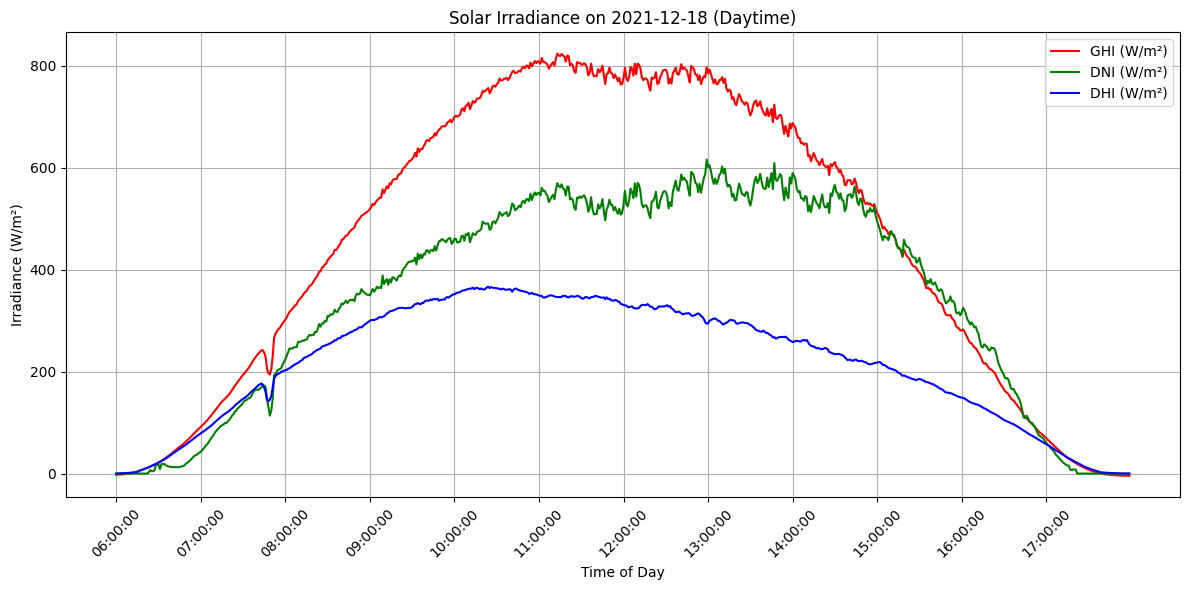

In [28]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=True,
    date="2021-12-18",
)

Selected Date: 2021-12-18


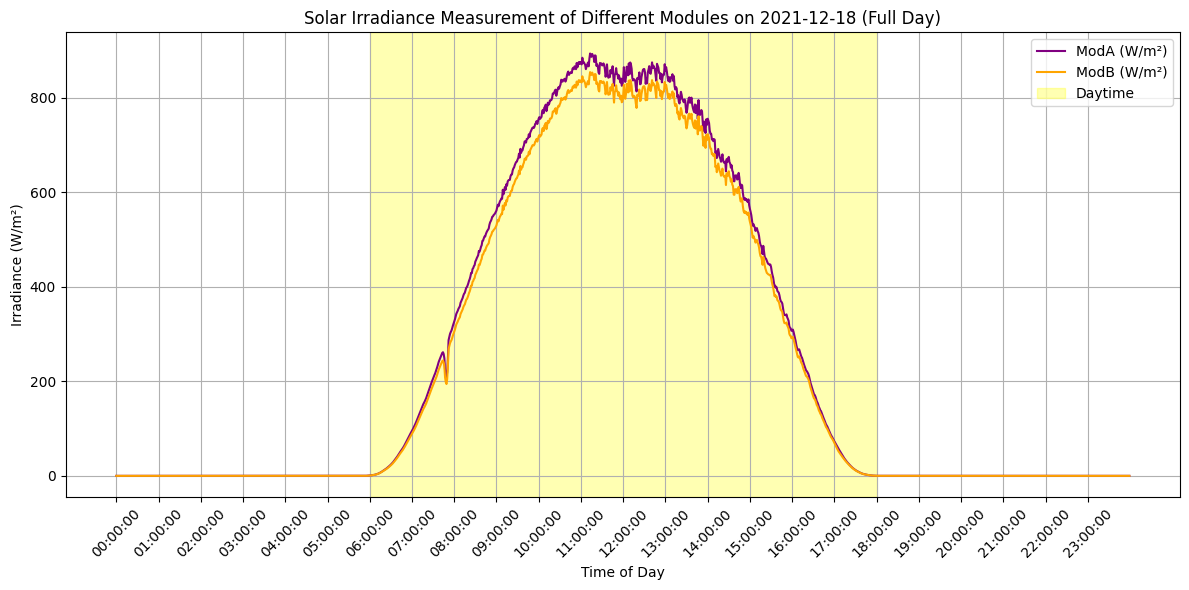

In [29]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
    ],
    title="Solar Irradiance Measurement of Different Modules",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


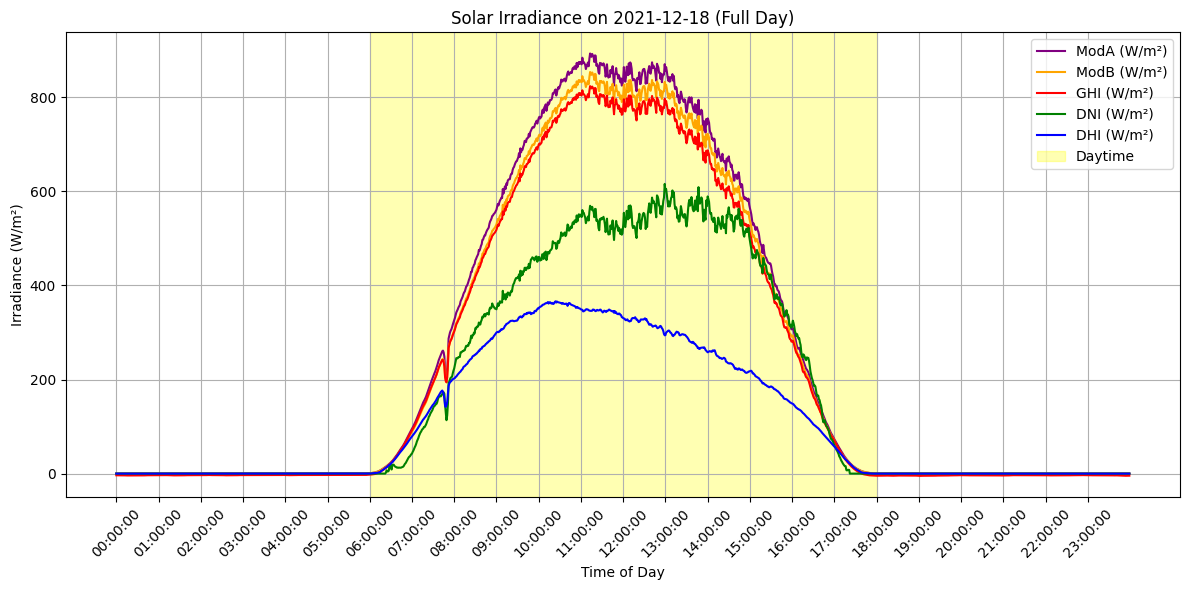

In [30]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


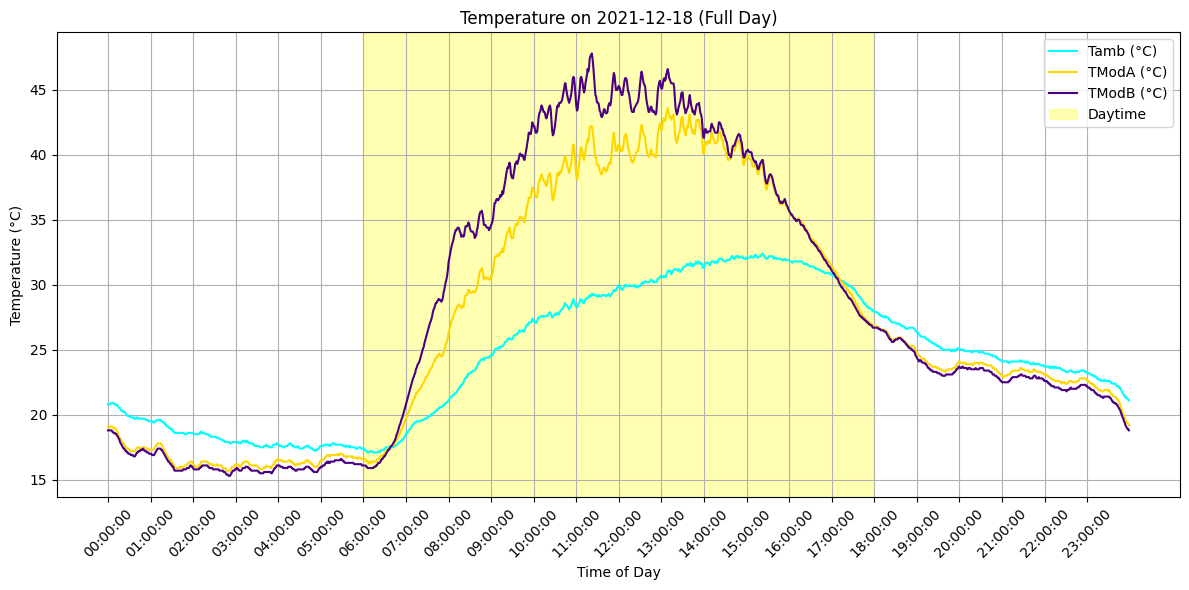

In [31]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "TModA", "label": "TModA (°C)", "color": "gold"},
        {"column": "TModB", "label": "TModB (°C)", "color": "indigo"},
    ],
    title="Temperature",
    ylabel="Temperature (°C)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


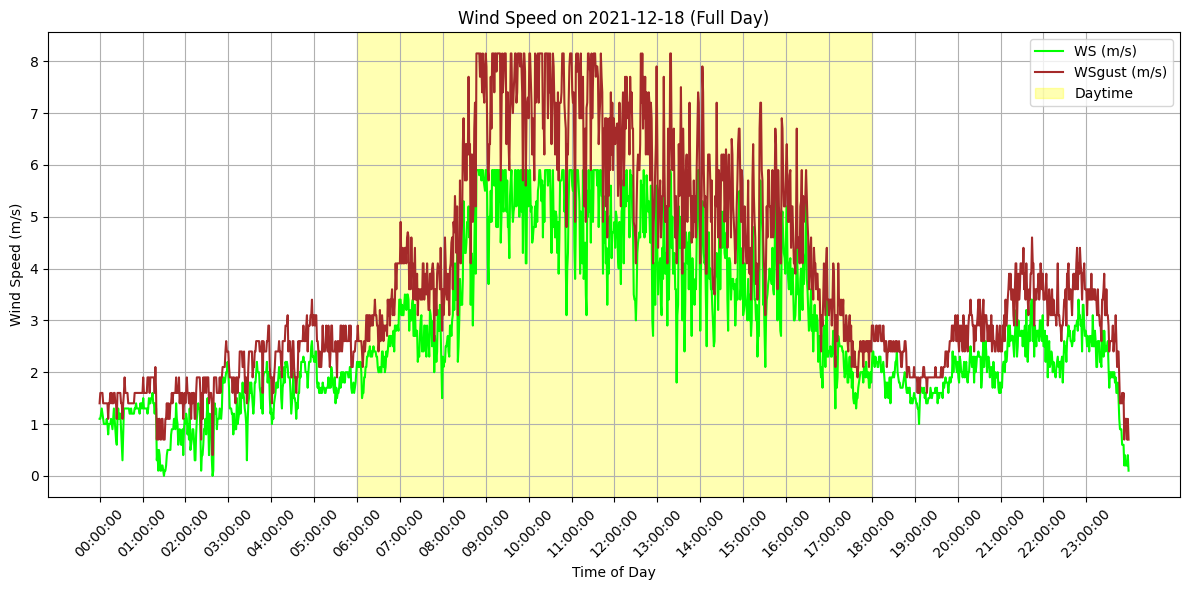

In [32]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Wind Speed",
    ylabel="Wind Speed (m/s)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


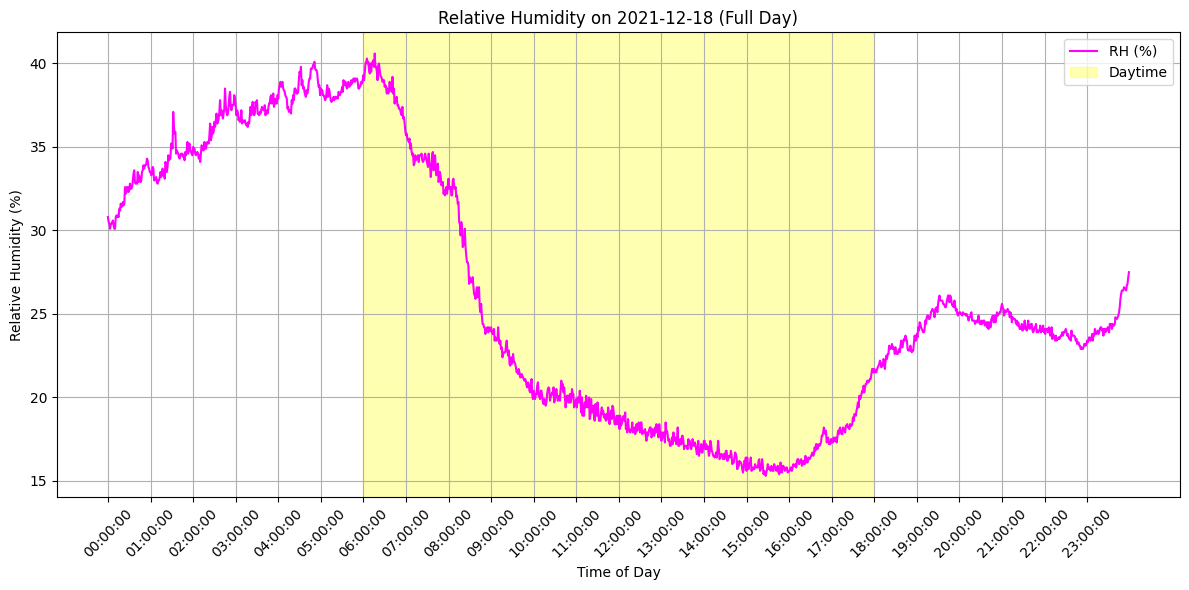

In [33]:
plot_day(
    df_tg,
    plot_data=[{"column": "RH", "label": "RH (%)", "color": "magenta"}],
    title="Relative Humidity",
    ylabel="Relative Humidity (%)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2021-12-18


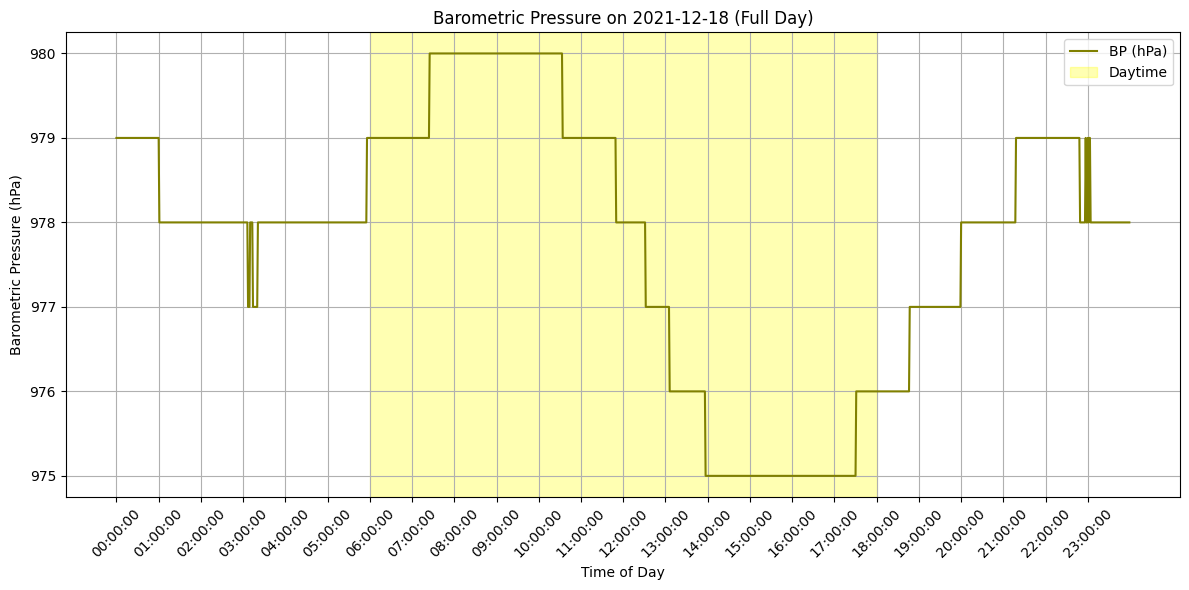

In [34]:
plot_day(
    df_tg,
    plot_data=[{"column": "BP", "label": "BP (hPa)", "color": "olive"}],
    title="Barometric Pressure",
    ylabel="Barometric Pressure (hPa)",
    daytime_only=False,
    date="2021-12-18",
)

Selected Date: 2022-02-05


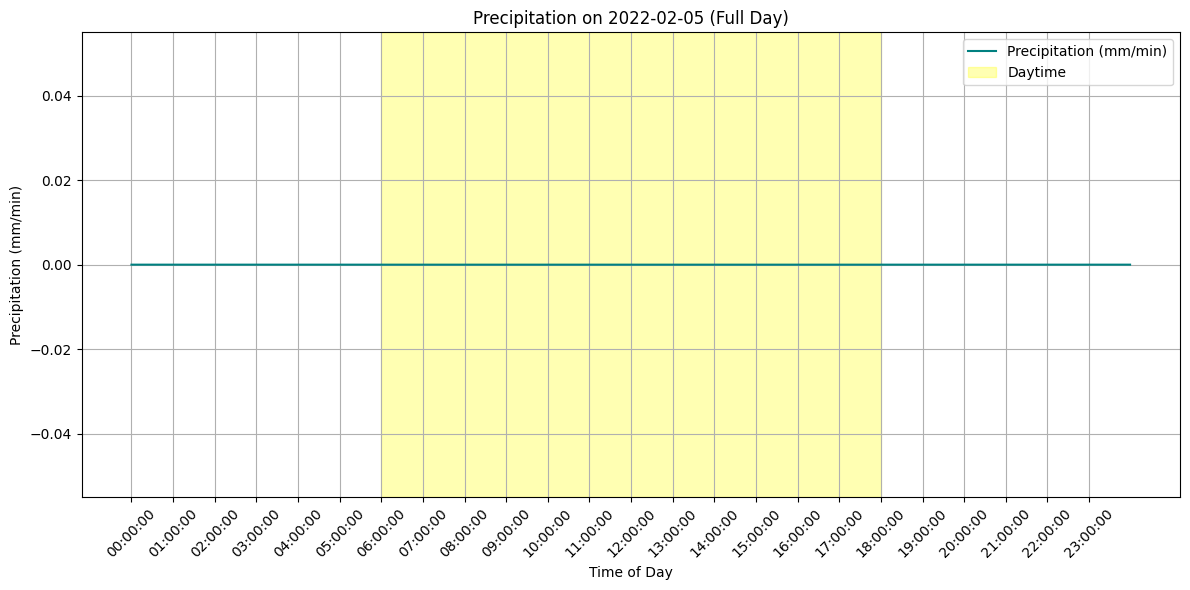

In [35]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "Precipitation", "label": "Precipitation (mm/min)", "color": "teal"}
    ],
    title="Precipitation",
    ylabel="Precipitation (mm/min)",
    daytime_only=False,
    # date='2021-12-18'
    # date='2022-04-20'
)

Selected Date: 2021-12-18


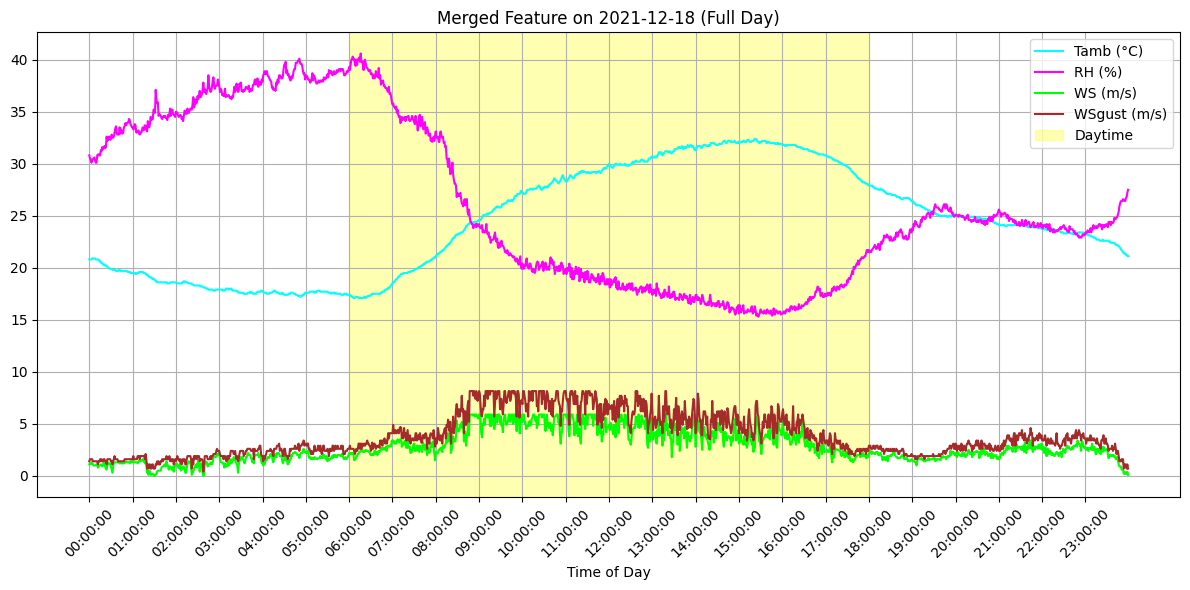

In [36]:
plot_day(
    df_tg,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "RH", "label": "RH (%)", "color": "magenta"},
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Merged Feature",
    ylabel="",
    daytime_only=False,
    date="2021-12-18",
)

### Monthly Time Series


In [37]:
def plot_month(df, plot_data, title, ylabel, daytime_only=True, month=None):
    """Plots the data feature for a randomly selected or specified month from the dataframe."""

    # Select the month: use provided month or choose randomly
    if not month:
        month = random.choice(df["month"].unique())

    print(f"Selected Month: {month}")

    # Filter the DataFrame for the selected month
    month_data = df[df["month"] == month]

    # Filter for daytime if daytime_only is True
    if daytime_only:
        month_data = month_data[
            (month_data.index.hour >= 6) & (month_data.index.hour < 18)
        ]

    plt.figure(figsize=(18, 6))

    # Plot the specified columns
    for data in plot_data:
        plt.plot(
            month_data.index,
            month_data[data["column"]],
            label=data["label"],
            color=data["color"],
        )

    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.title(
        f"{title} for {month_data['month_name'].iloc[0]} ({'Daytime' if daytime_only else 'Full Day'})"
    )
    plt.legend()
    plt.grid(True)

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Selected Month: 4


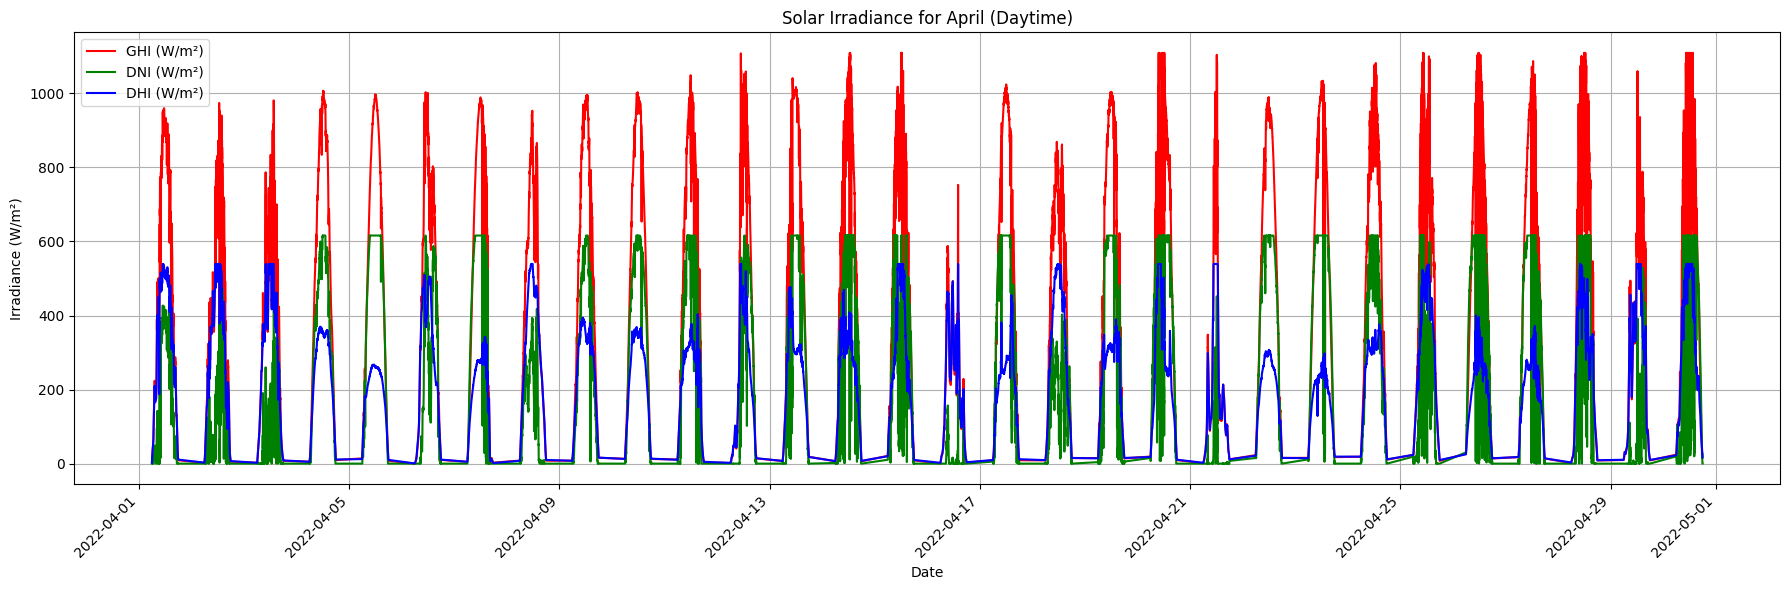

In [38]:
plot_month(
    df_tg,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=True,
    month=4,
)

Selected Month: 4


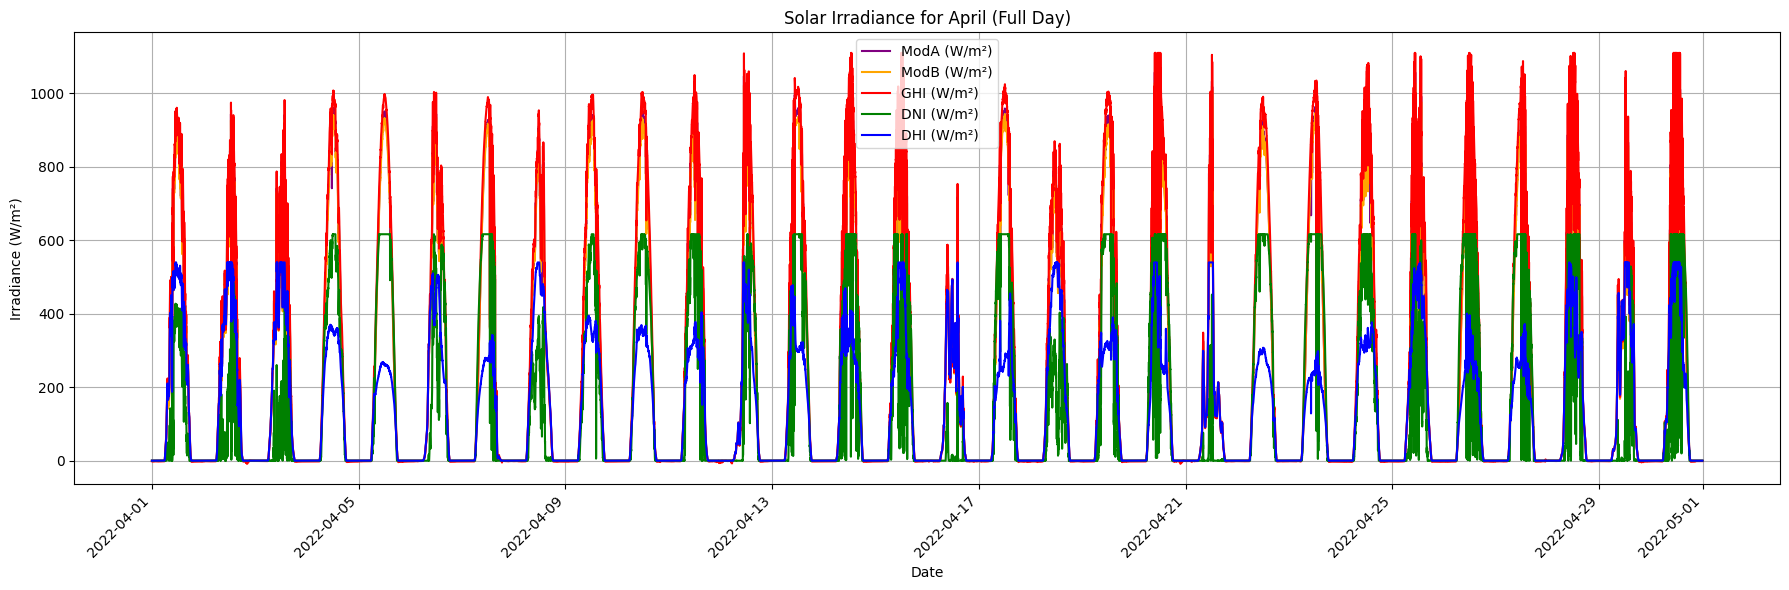

In [39]:
plot_month(
    df_tg,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)", "color": "purple"},
        {"column": "ModB", "label": "ModB (W/m²)", "color": "orange"},
        {"column": "GHI", "label": "GHI (W/m²)", "color": "red"},
        {"column": "DNI", "label": "DNI (W/m²)", "color": "green"},
        {"column": "DHI", "label": "DHI (W/m²)", "color": "blue"},
    ],
    title="Solar Irradiance",
    ylabel="Irradiance (W/m²)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


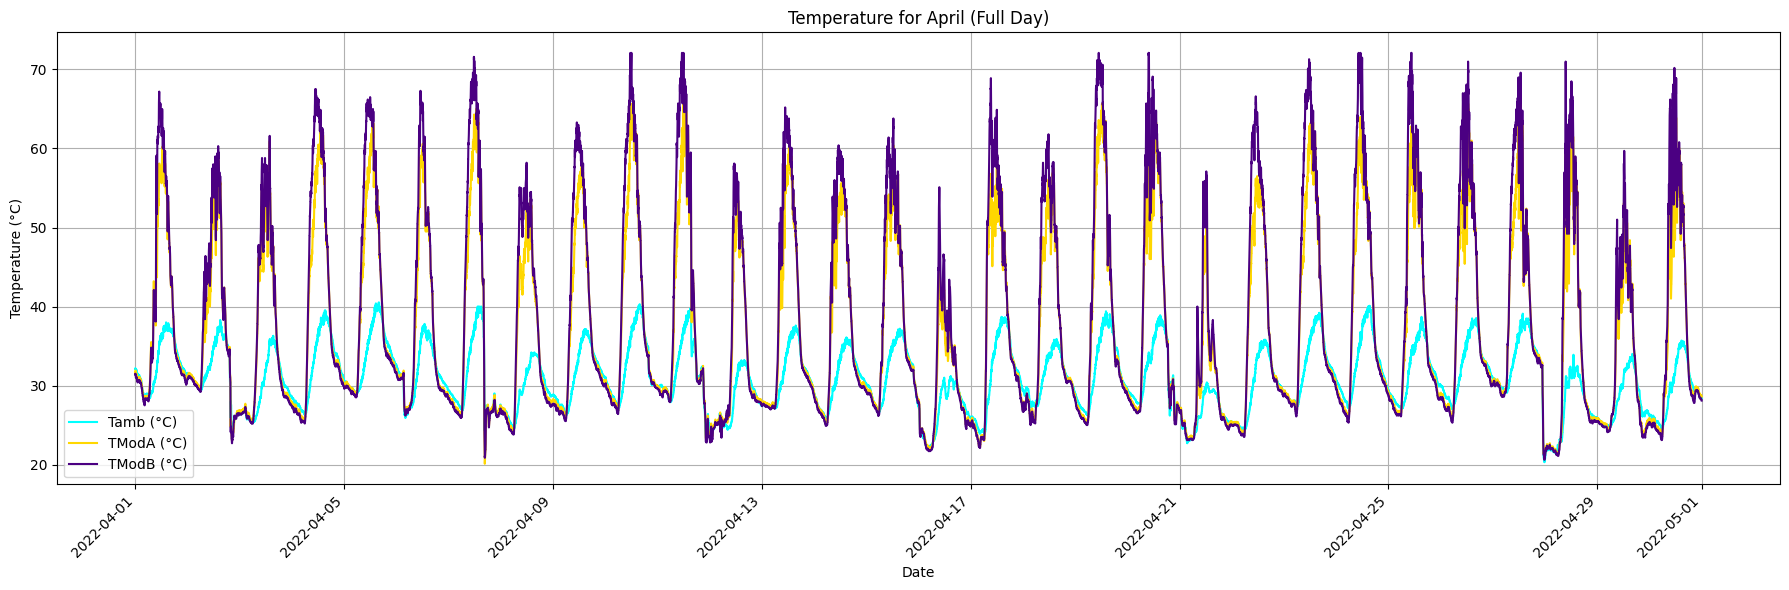

In [40]:
plot_month(
    df_tg,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "TModA", "label": "TModA (°C)", "color": "gold"},
        {"column": "TModB", "label": "TModB (°C)", "color": "indigo"},
    ],
    title="Temperature",
    ylabel="Temperature (°C)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


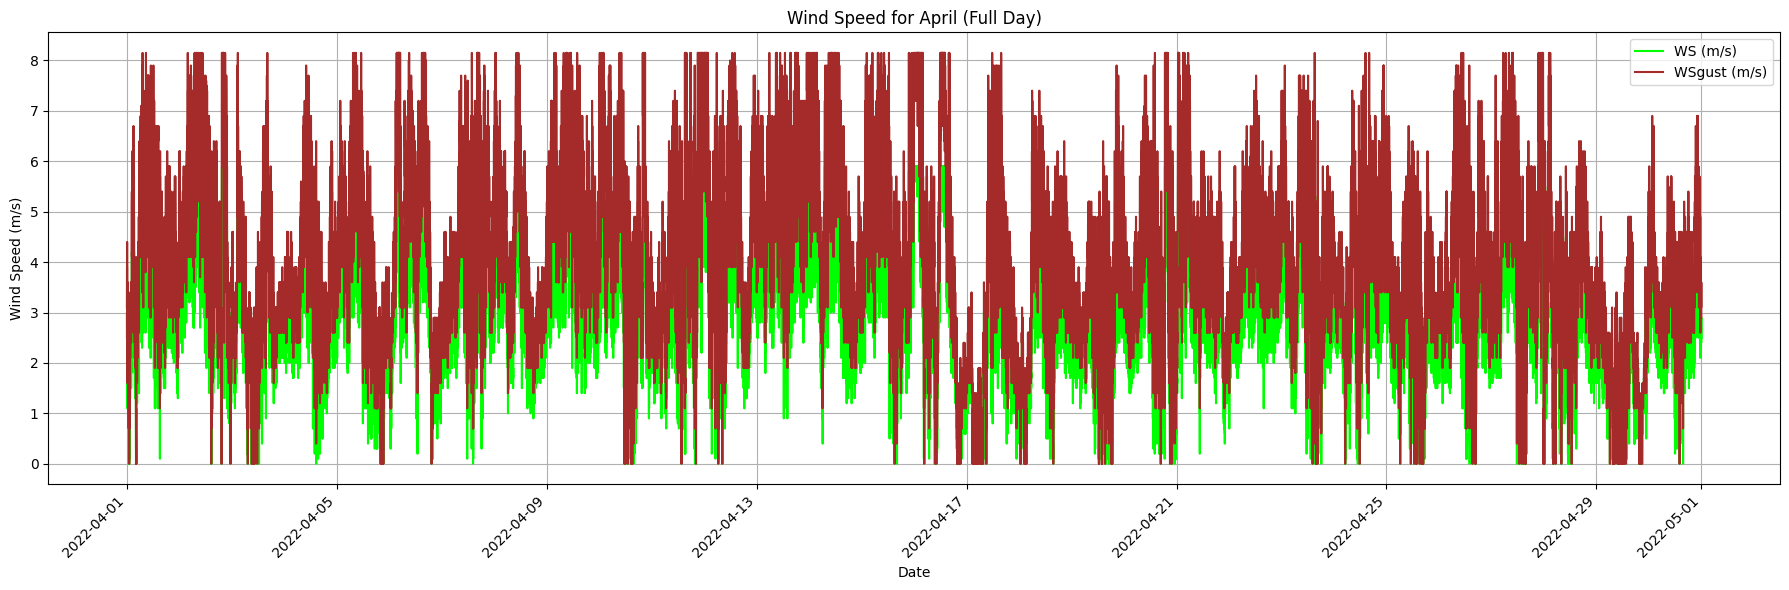

In [41]:
plot_month(
    df_tg,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Wind Speed",
    ylabel="Wind Speed (m/s)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


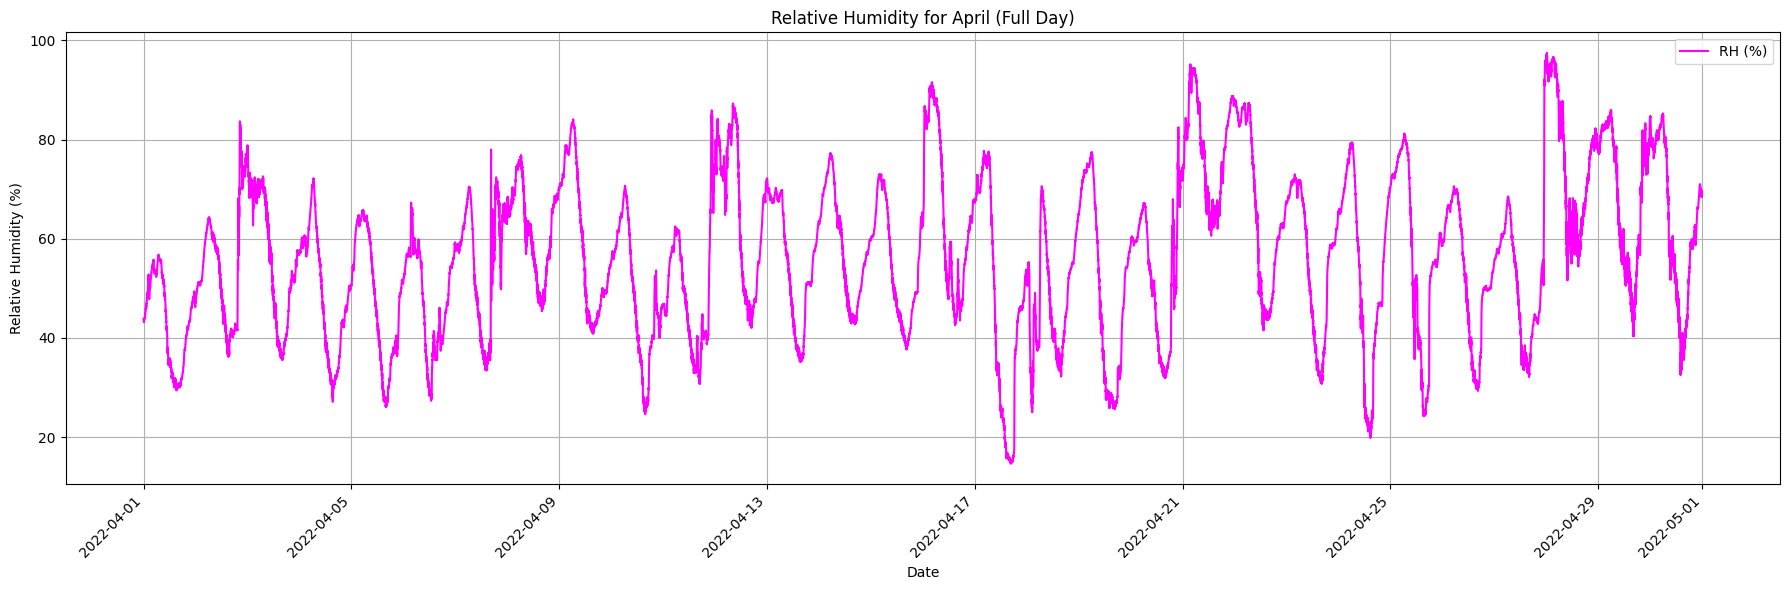

In [42]:
plot_month(
    df_tg,
    plot_data=[{"column": "RH", "label": "RH (%)", "color": "magenta"}],
    title="Relative Humidity",
    ylabel="Relative Humidity (%)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


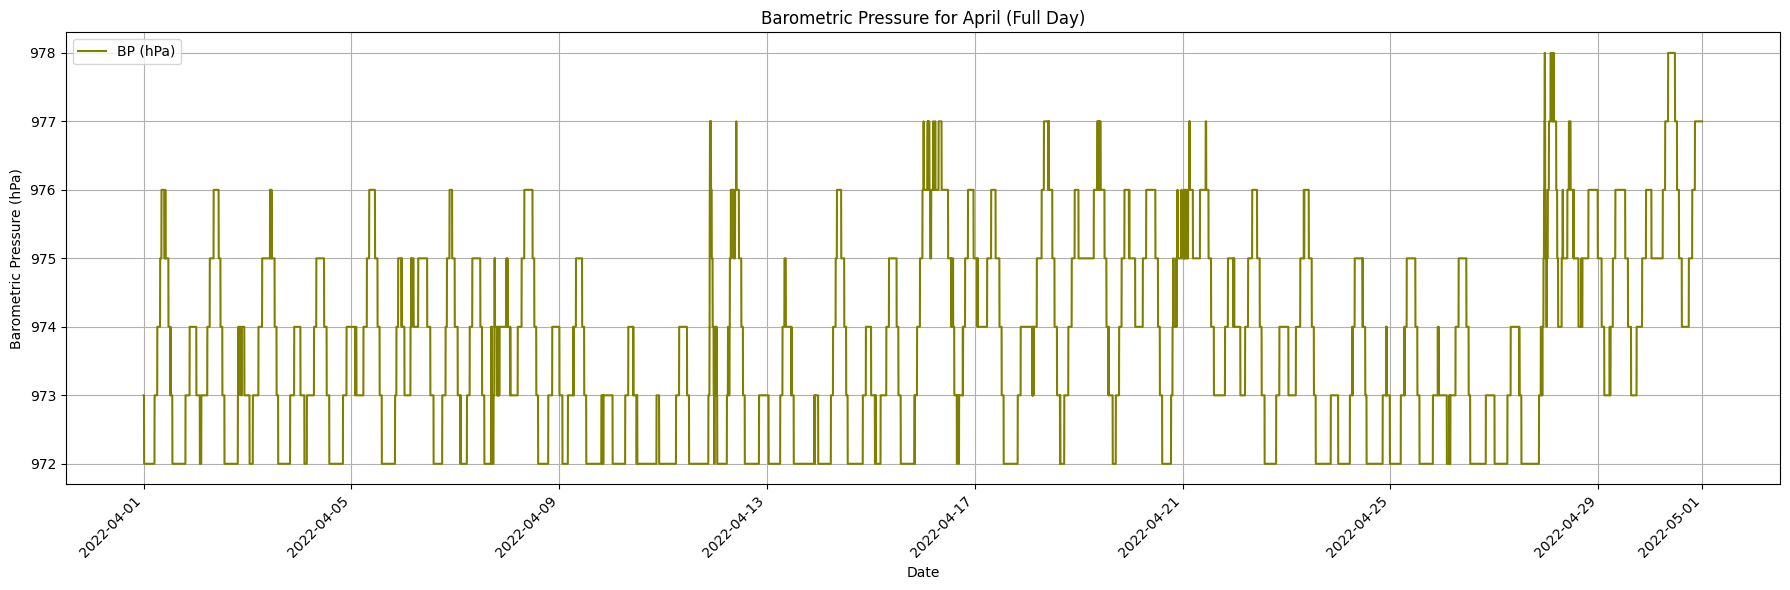

In [43]:
plot_month(
    df_tg,
    plot_data=[{"column": "BP", "label": "BP (hPa)", "color": "olive"}],
    title="Barometric Pressure",
    ylabel="Barometric Pressure (hPa)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


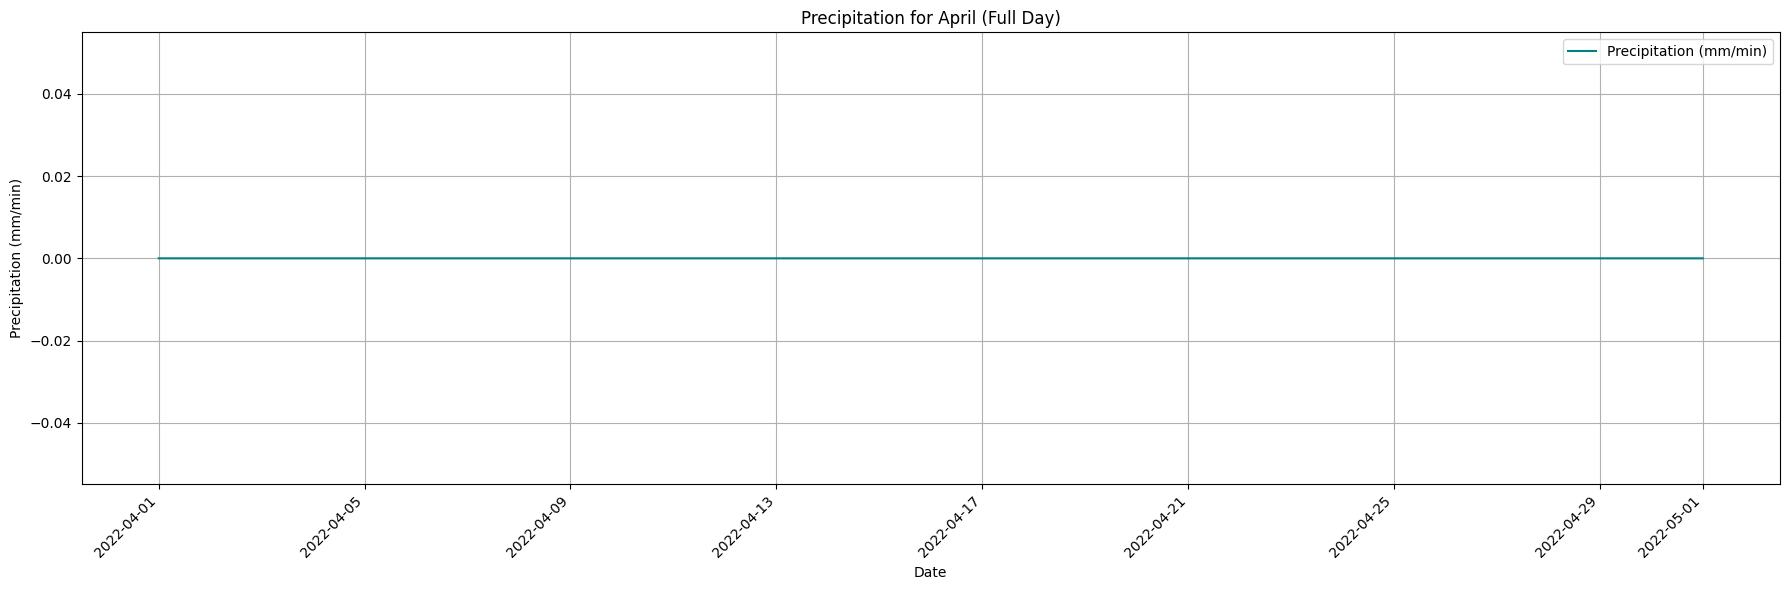

In [44]:
plot_month(
    df_tg,
    plot_data=[
        {"column": "Precipitation", "label": "Precipitation (mm/min)", "color": "teal"}
    ],
    title="Precipitation",
    ylabel="Precipitation (mm/min)",
    daytime_only=False,
    month=4,
)

Selected Month: 4


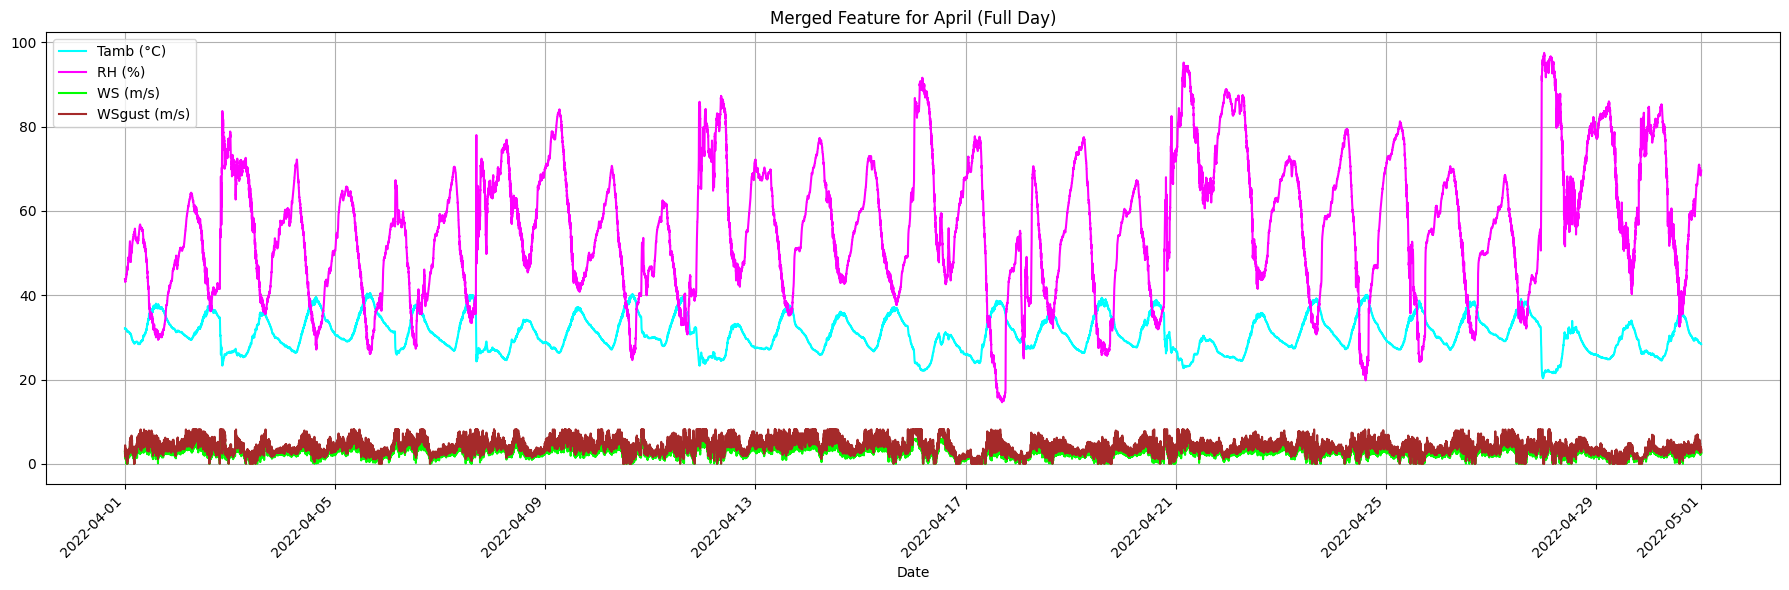

In [45]:
plot_month(
    df_tg,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)", "color": "cyan"},
        {"column": "RH", "label": "RH (%)", "color": "magenta"},
        {"column": "WS", "label": "WS (m/s)", "color": "lime"},
        {"column": "WSgust", "label": "WSgust (m/s)", "color": "brown"},
    ],
    title="Merged Feature",
    ylabel="",
    daytime_only=False,
    month=4,
)

### Days of the Month Plots

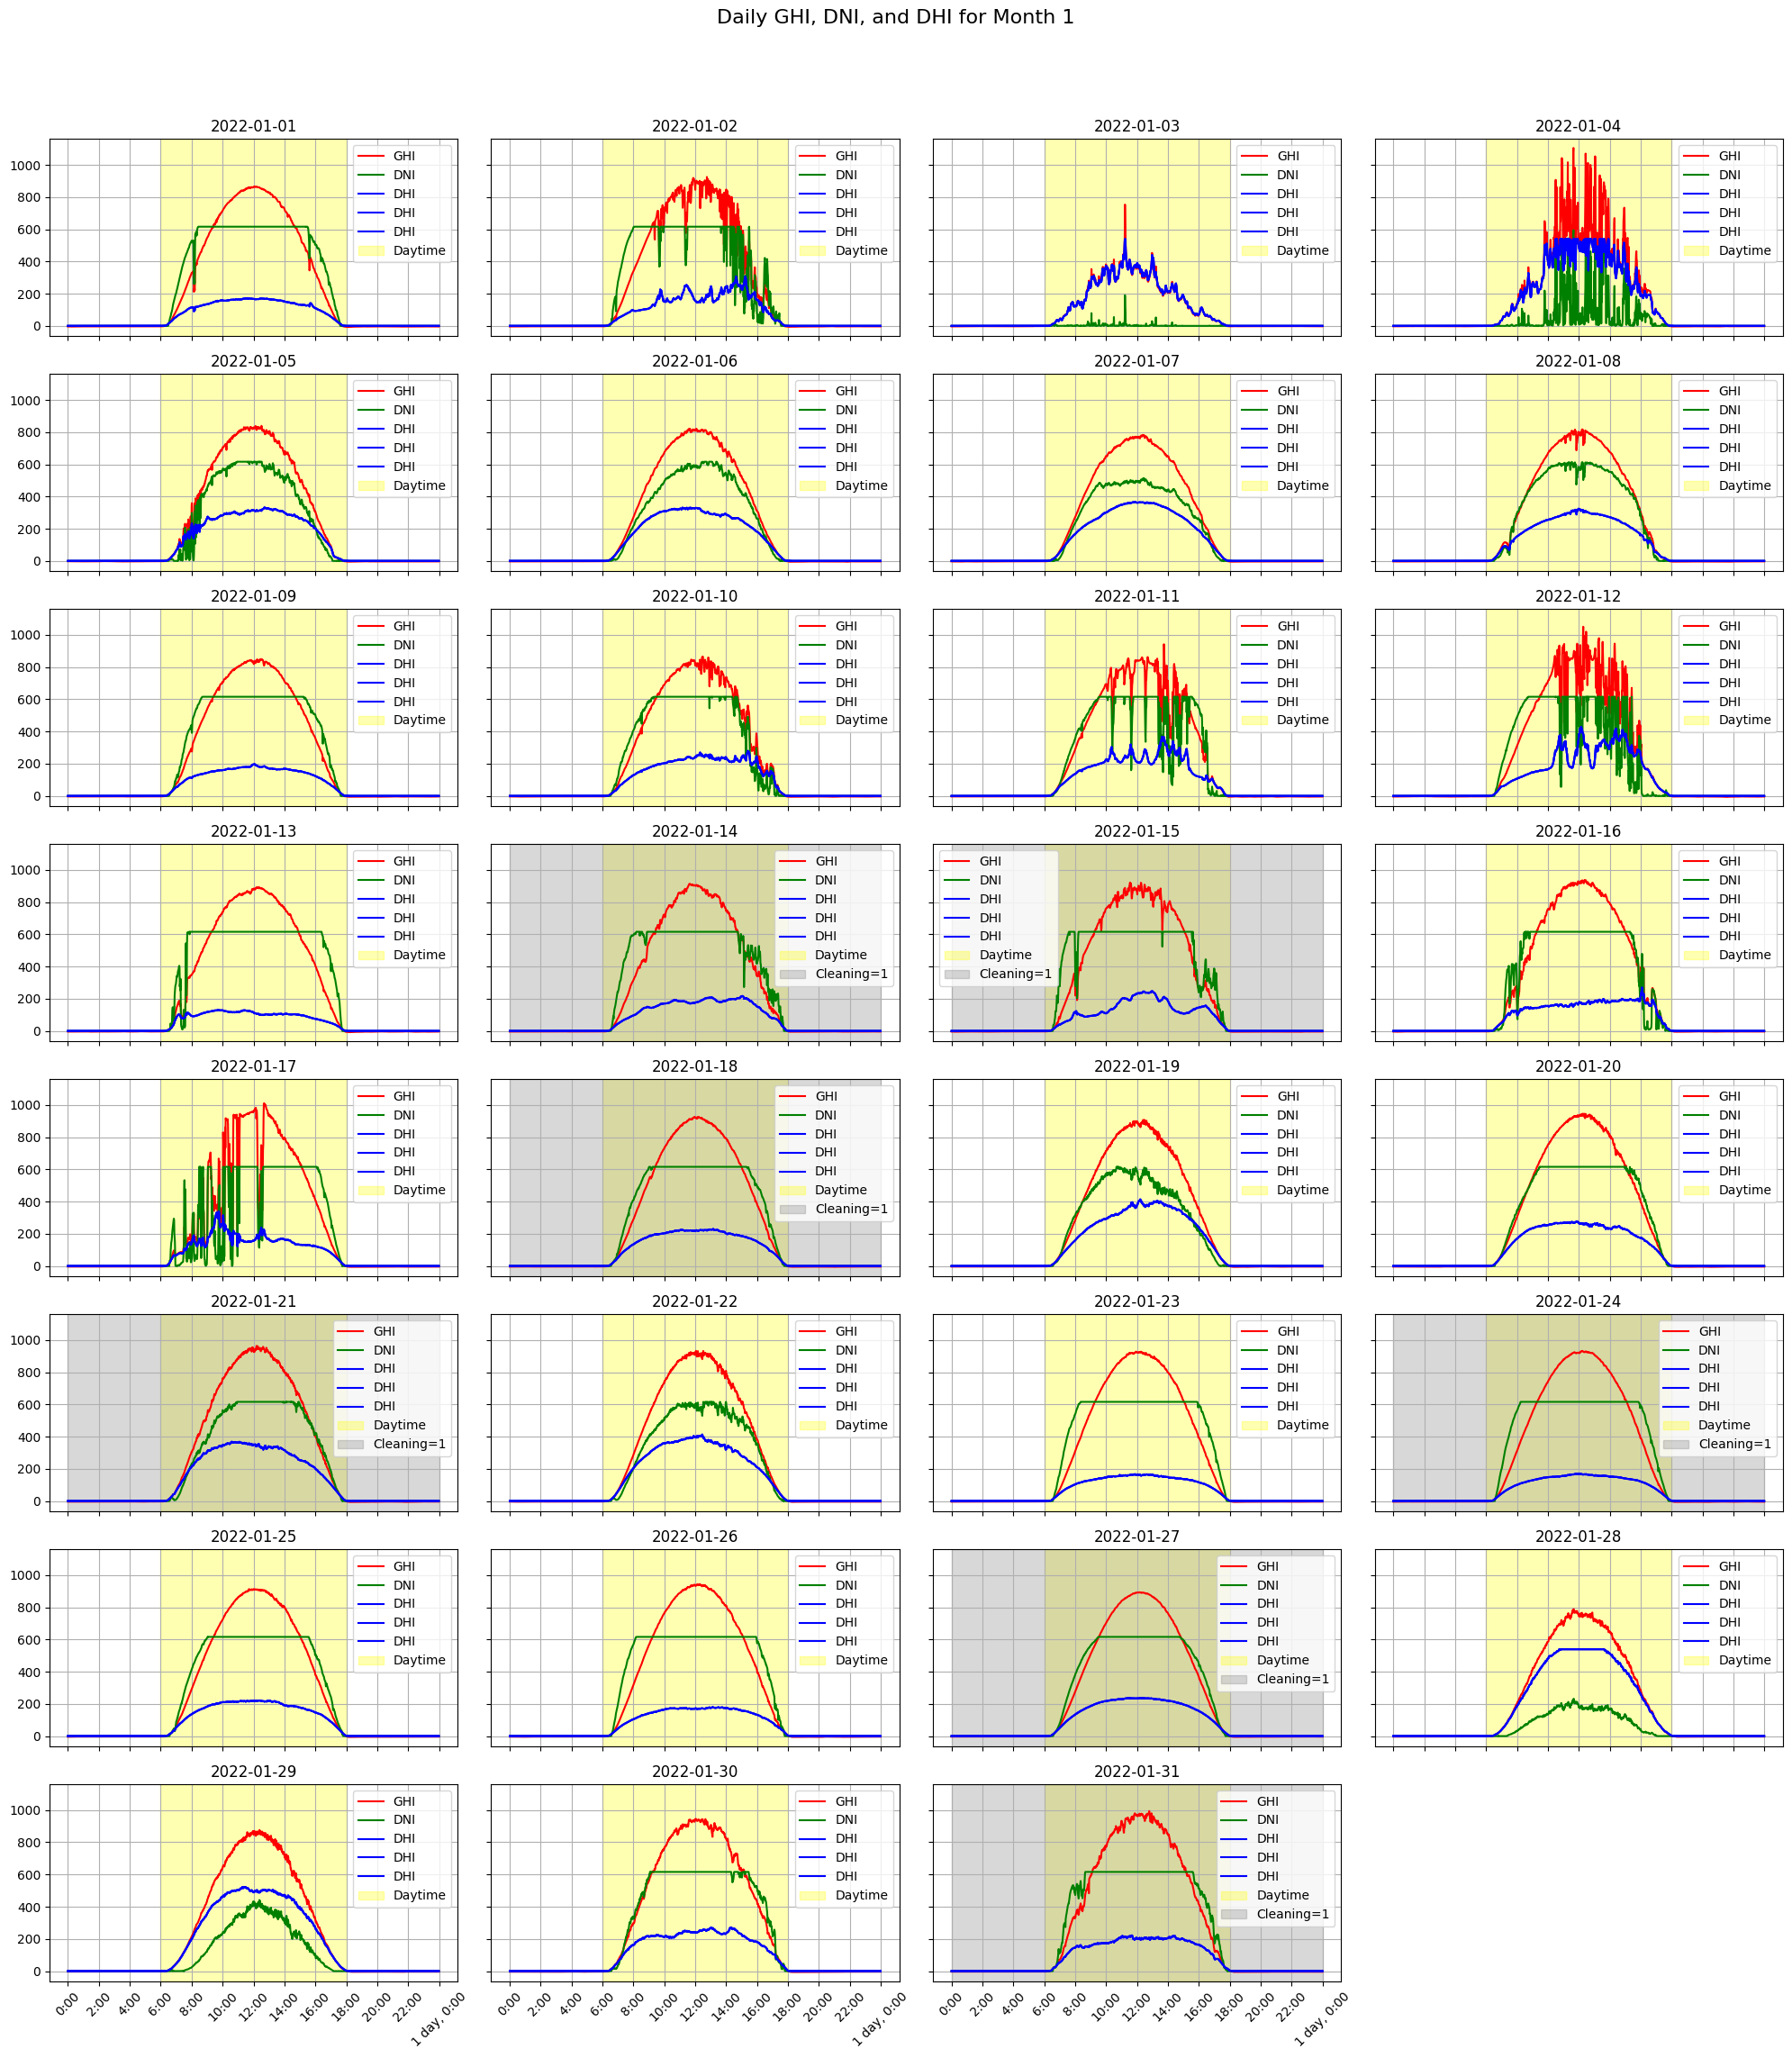

In [46]:
from datetime import timedelta

month_to_plot = 1

# Filter the DataFrame for the selected month
monthly_data = df_tg[df_tg.index.month == month_to_plot]
date_cleaned = monthly_data[monthly_data["Cleaning"] == 1]["date"].unique()


# Create a pivot table for each variable (GHI, DNI, DHI)
ghi_pivot = monthly_data.pivot_table(values="GHI", index="time", columns="date")
dni_pivot = monthly_data.pivot_table(values="DNI", index="time", columns="date")
dhi_pivot = monthly_data.pivot_table(values="DHI", index="time", columns="date")

# Get the number of days in the selected month
num_days = len(ghi_pivot.columns)

# Calculate the number of rows and columns for subplots
num_cols = 4
num_rows = (num_days + num_cols - 1) // num_cols

fig, axes = plt.subplots(
    num_rows, num_cols, figsize=(20, 3 * num_rows), sharex=True, sharey=True
)
fig.suptitle(f"Daily GHI, DNI, and DHI for Month {month_to_plot}", fontsize=16)


# Iterate through the days and plot the data
for i, date in enumerate(ghi_pivot.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Convert datetime.time objects to numerical values (total seconds since midnight)
    x_values = [t.hour * 3600 + t.minute * 60 + t.second for t in ghi_pivot.index]

    ax.plot(x_values, ghi_pivot[date], label="GHI", color="red")
    ax.plot(x_values, dni_pivot[date], label="DNI", color="green")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")
    ax.plot(x_values, dhi_pivot[date], label="DHI", color="blue")

    # Highlight daytime (6 AM to 6 PM)
    ax.axvspan(6 * 3600, 18 * 3600, color="yellow", alpha=0.3, label="Daytime")

    # hightlight the entire plot if cleaning column of month data == 1
    if date in date_cleaned:
        ax.axvspan(0, 24 * 3600, color="grey", alpha=0.3, label="Cleaning=1")

    ax.set_title(date.strftime("%Y-%m-%d"))
    ax.legend()
    ax.grid(True)

    # Convert seconds to HH:MM format for xticks
    xticks = range(0, 24 * 3600 + 1, 2 * 3600)  # 2-hour intervals
    xtick_labels = [str(timedelta(seconds=t))[:-3] for t in xticks]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)

# Hide any unused subplots
for i in range(num_days, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

Observations:
- Cleaning make the measurement a lot less noisy

## Histogram and Boxplots

In [47]:
def generate_hist_box_plots(df, plot_data, suptitle):
    """
    Generates histplots and boxplots for a list of dictionaries of title and column name.
    """

    num_cols = len(plot_data)
    fig, axes = plt.subplots(
        nrows=2,
        ncols=num_cols,
        figsize=(20, 5),
        sharey="row",
        sharex="col",
        gridspec_kw={"height_ratios": [7, 0.4]},
    )

    for i in range(len(plot_data)):
        sns.histplot(df[plot_data[i]["column"]], kde=True, ax=axes[0, i])
        sns.boxplot(x=df[plot_data[i]["column"]], ax=axes[1, i], orient="h")
        axes[1, i].set_xlabel(plot_data[i]["label"], fontsize=10)

    fig.suptitle(suptitle)
    fig.tight_layout()
    plt.show()

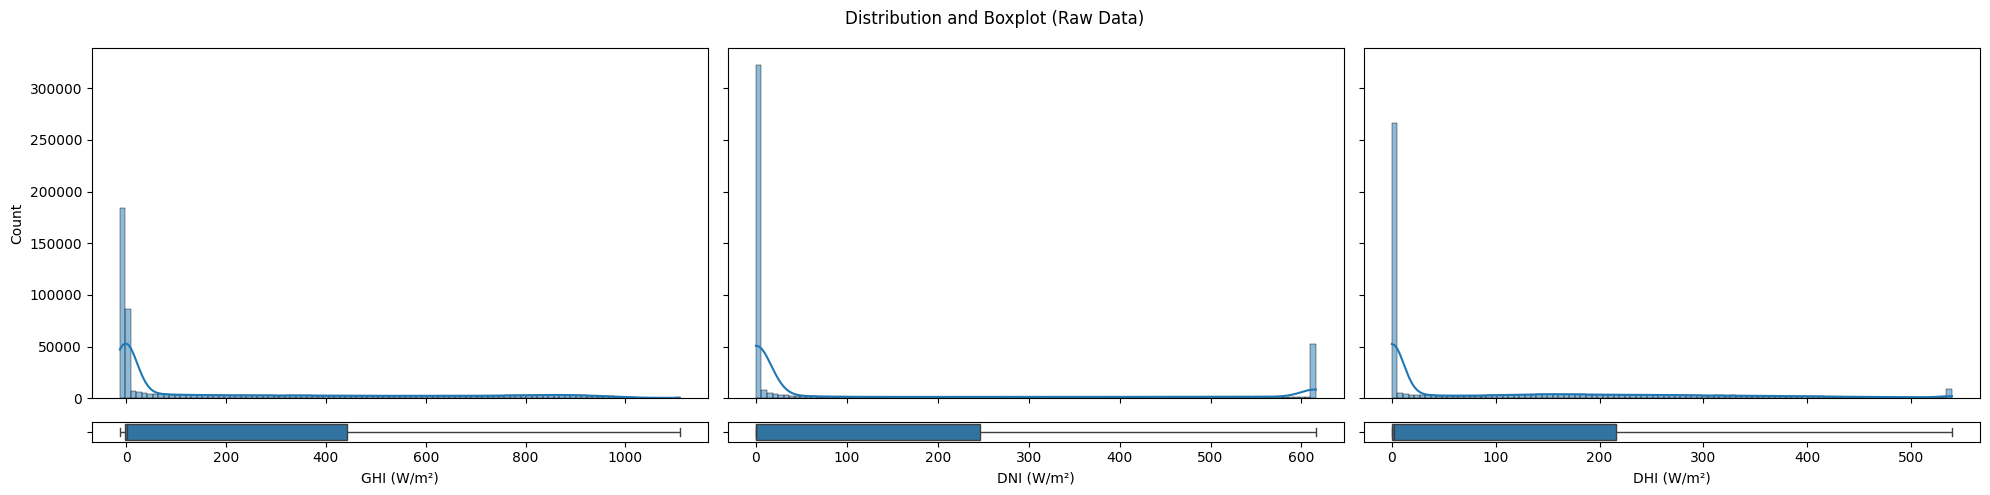

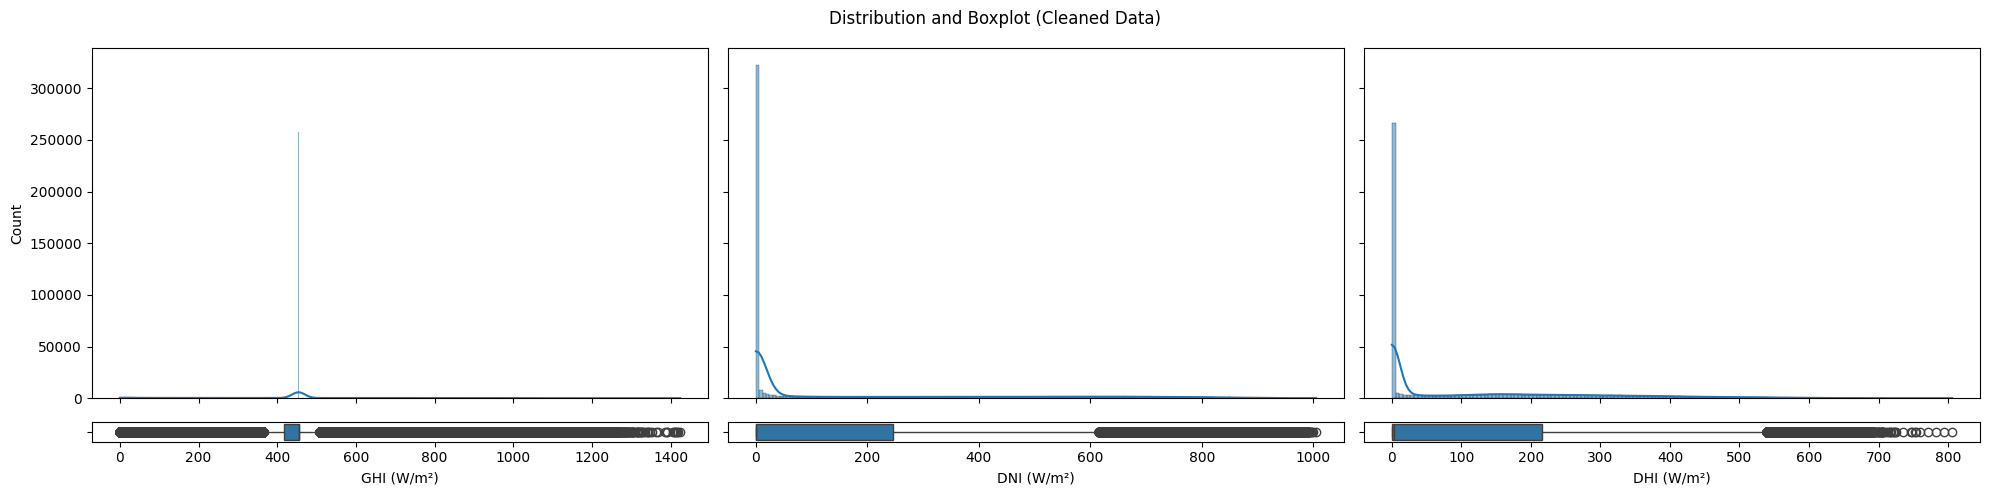

In [48]:
generate_hist_box_plots(
    df_tg,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)"},
        {"column": "DNI", "label": "DNI (W/m²)"},
        {"column": "DHI", "label": "DHI (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)

generate_hist_box_plots(
    df_tg_cleaned,
    plot_data=[
        {"column": "GHI", "label": "GHI (W/m²)"},
        {"column": "DNI", "label": "DNI (W/m²)"},
        {"column": "DHI", "label": "DHI (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

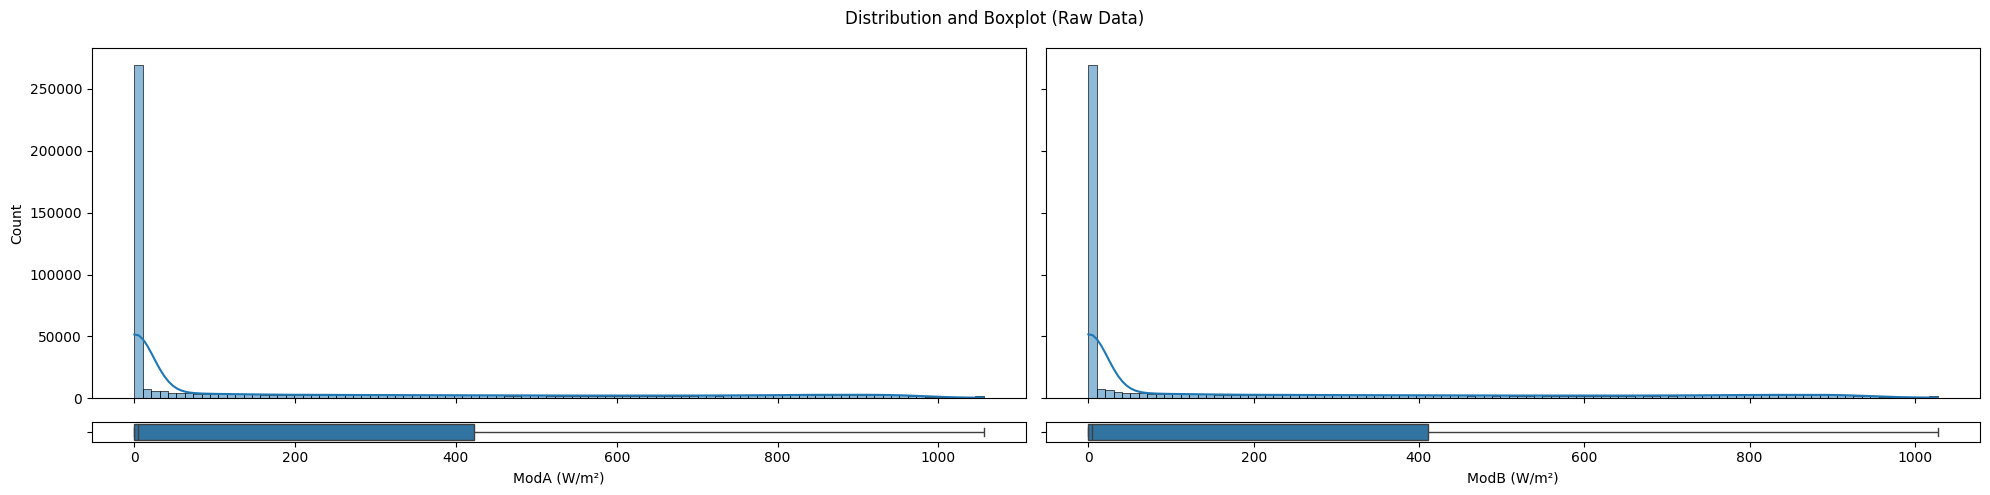

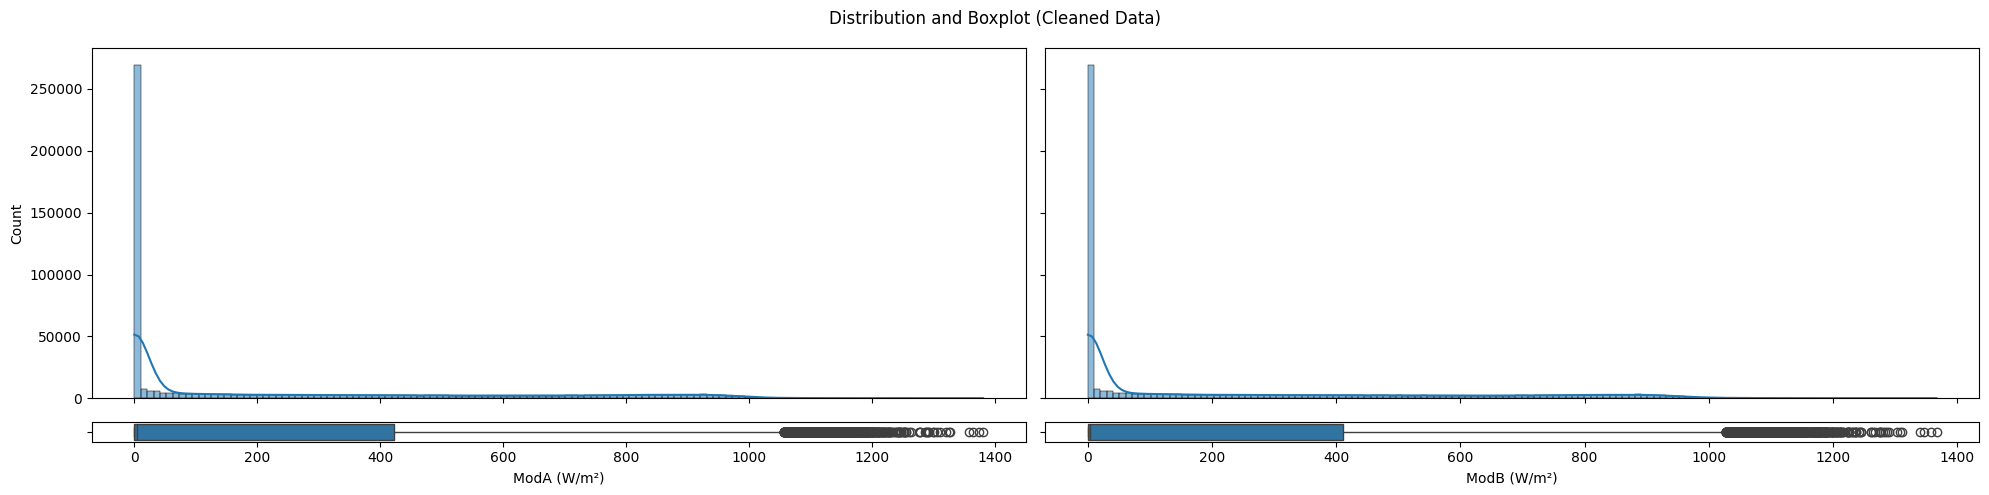

In [49]:
generate_hist_box_plots(
    df_tg,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)"},
        {"column": "ModB", "label": "ModB (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_tg_cleaned,
    plot_data=[
        {"column": "ModA", "label": "ModA (W/m²)"},
        {"column": "ModB", "label": "ModB (W/m²)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

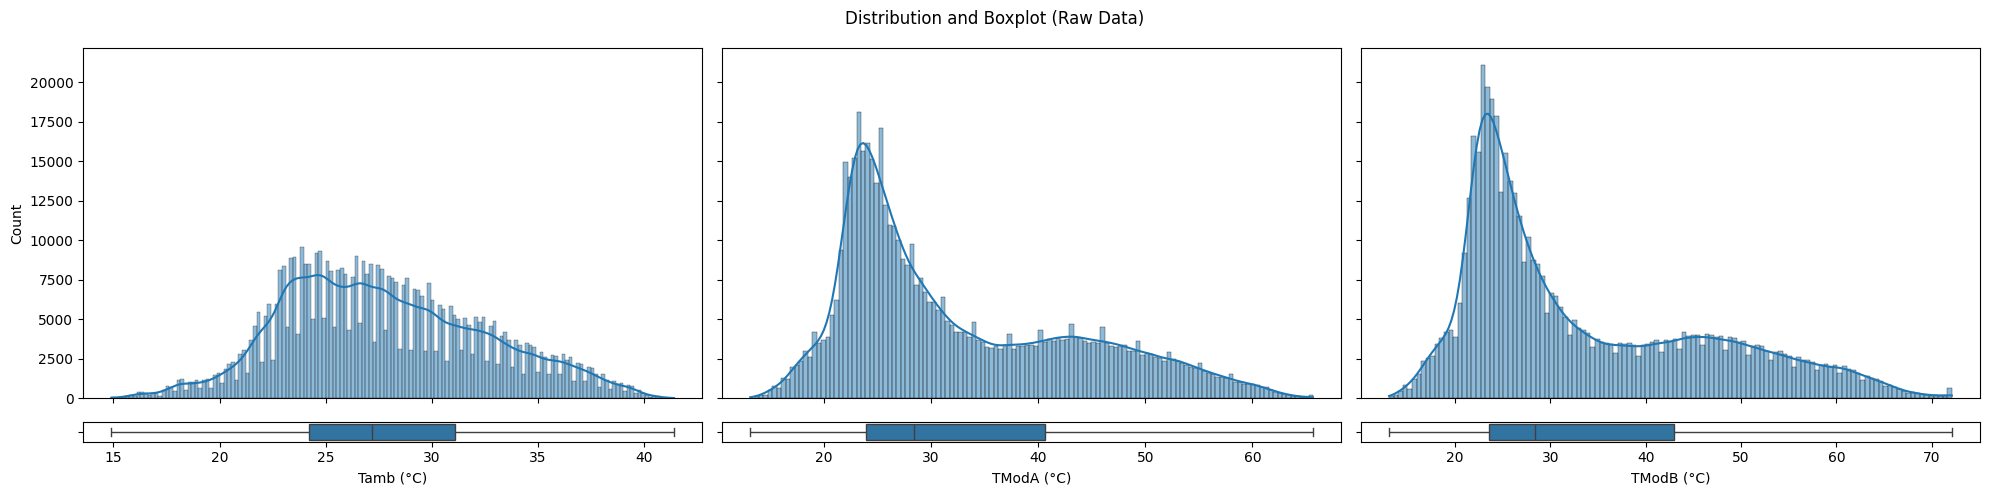

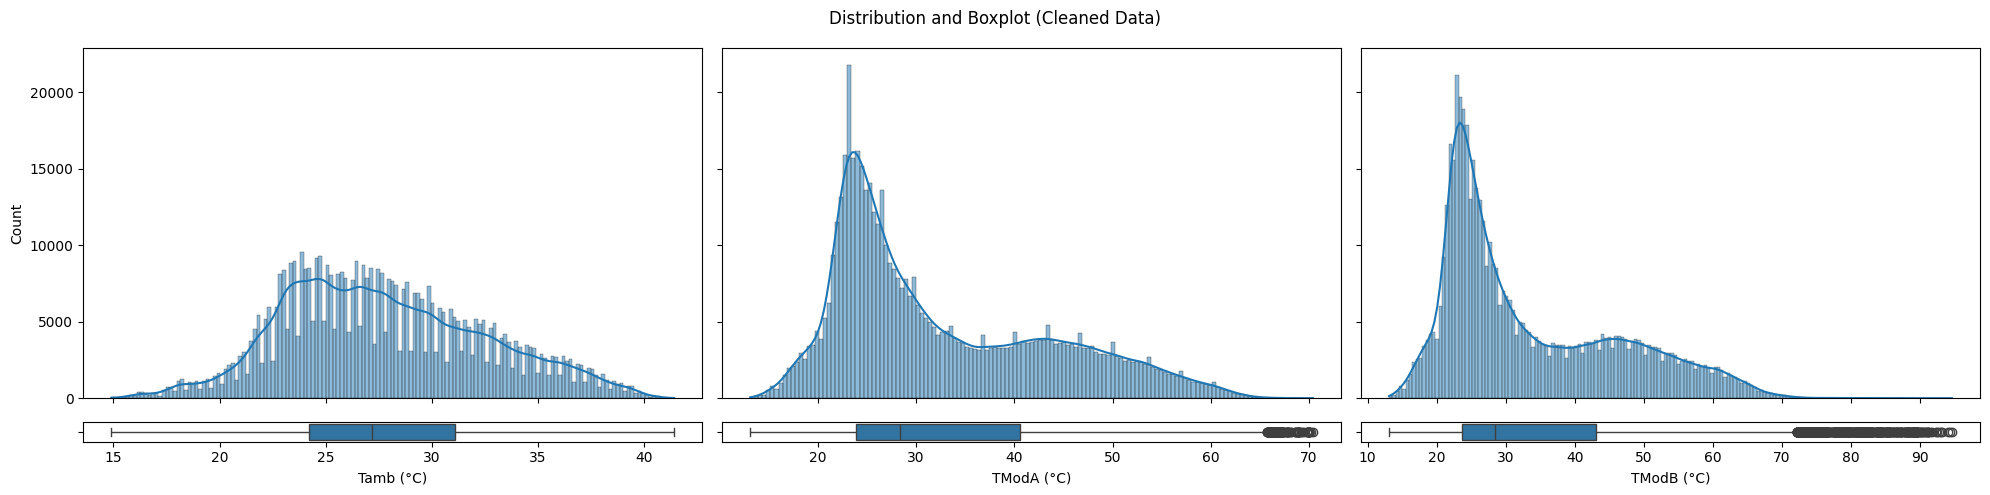

In [50]:
generate_hist_box_plots(
    df_tg,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)"},
        {"column": "TModA", "label": "TModA (°C)"},
        {"column": "TModB", "label": "TModB (°C)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)

generate_hist_box_plots(
    df_tg_cleaned,
    plot_data=[
        {"column": "Tamb", "label": "Tamb (°C)"},
        {"column": "TModA", "label": "TModA (°C)"},
        {"column": "TModB", "label": "TModB (°C)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

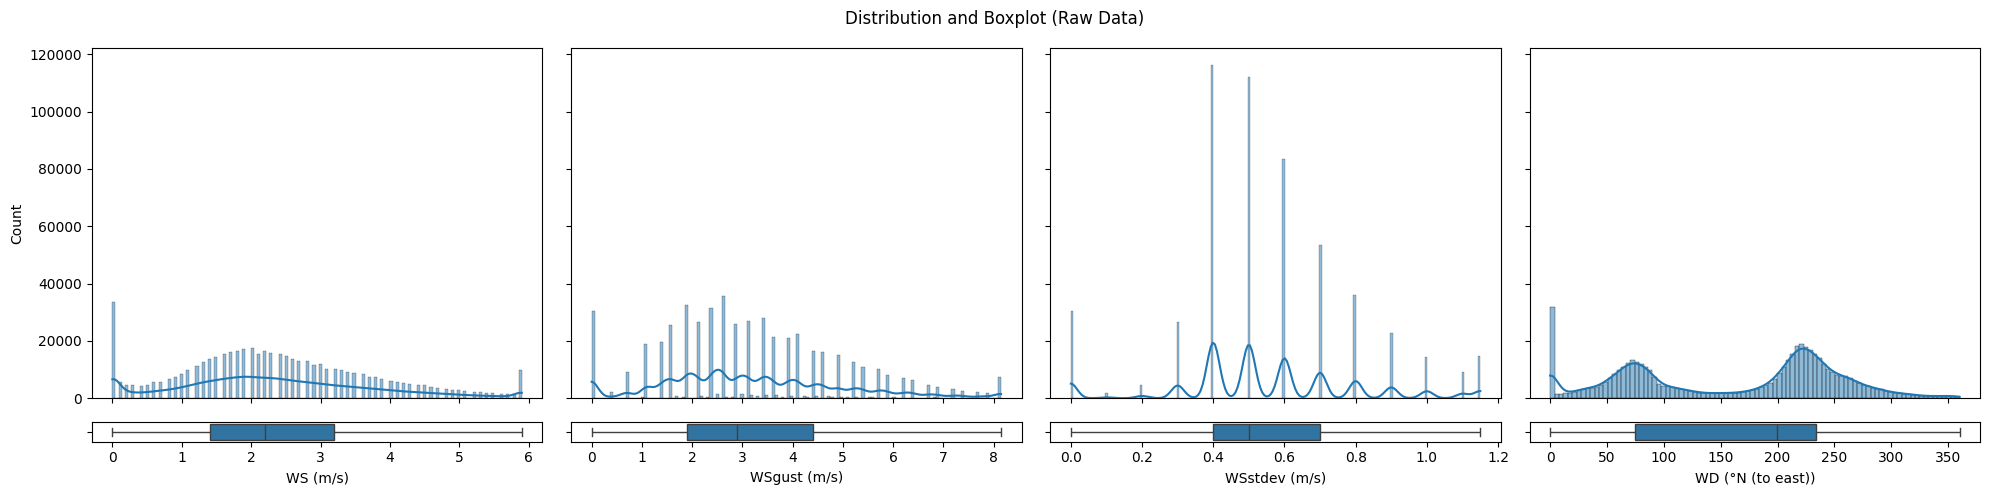

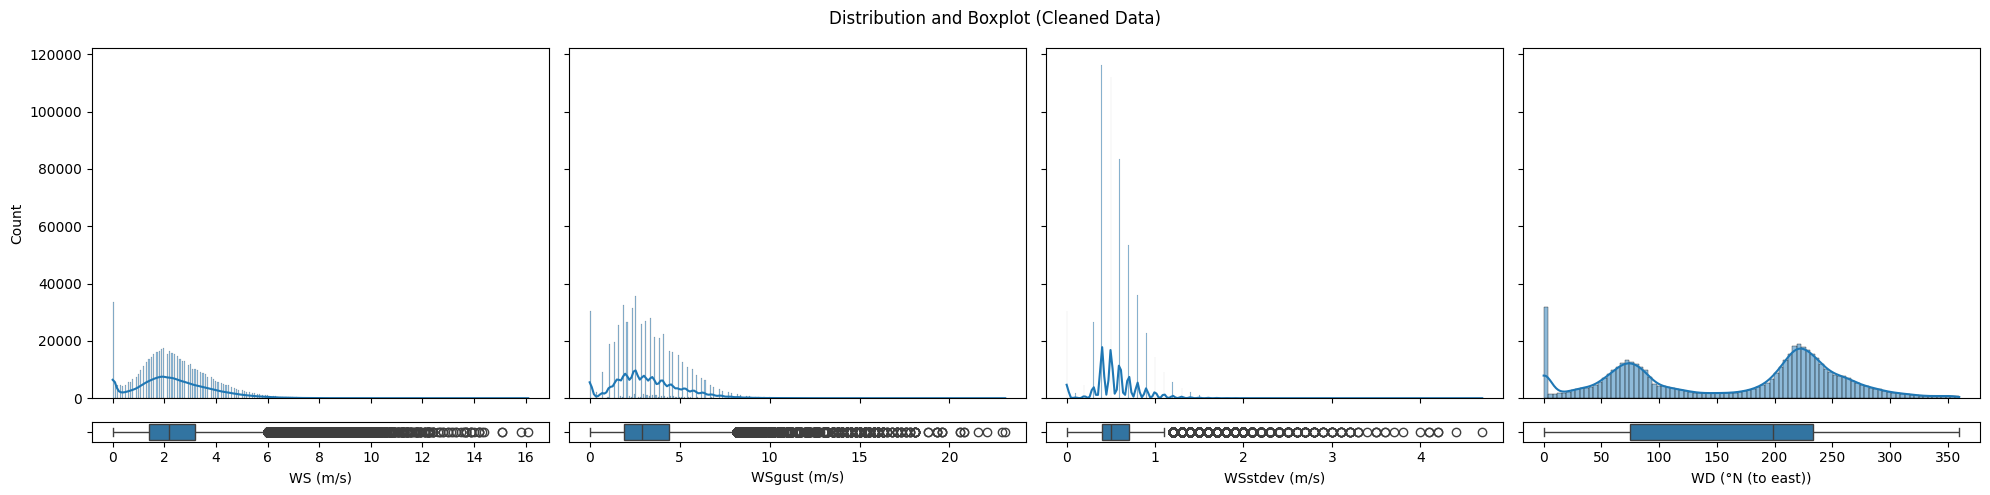

In [51]:
generate_hist_box_plots(
    df_tg,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)"},
        {"column": "WSgust", "label": "WSgust (m/s)"},
        {"column": "WSstdev", "label": "WSstdev (m/s)"},
        {"column": "WD", "label": "WD (°N (to east))"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_tg_cleaned,
    plot_data=[
        {"column": "WS", "label": "WS (m/s)"},
        {"column": "WSgust", "label": "WSgust (m/s)"},
        {"column": "WSstdev", "label": "WSstdev (m/s)"},
        {"column": "WD", "label": "WD (°N (to east))"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

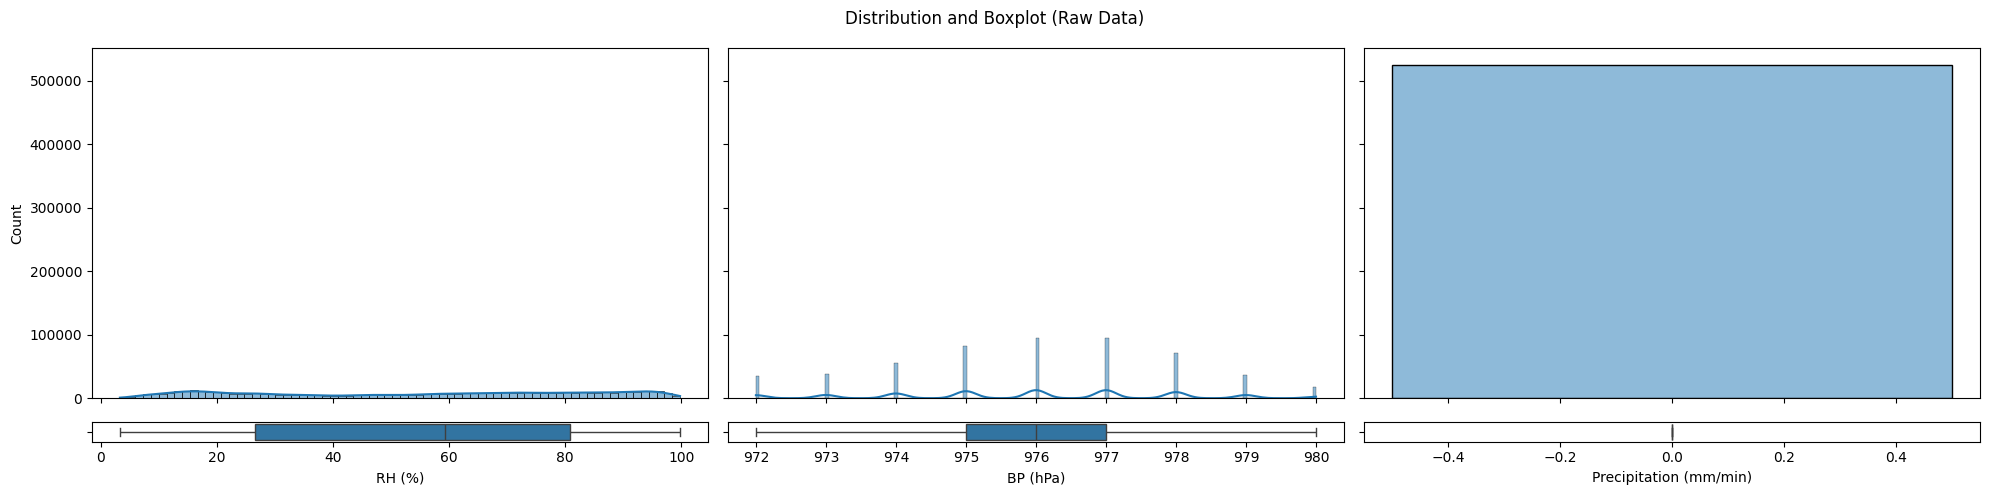

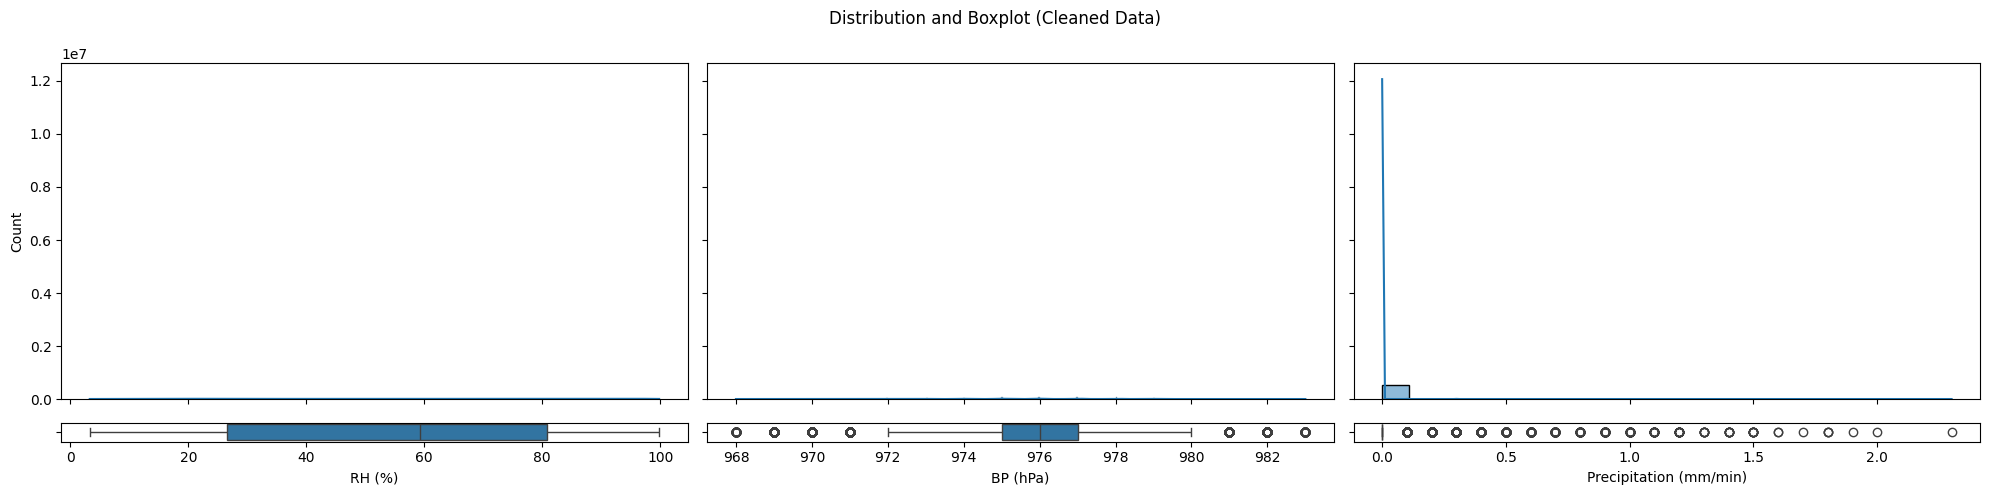

In [52]:
generate_hist_box_plots(
    df_tg,
    plot_data=[
        {"column": "RH", "label": "RH (%)"},
        {"column": "BP", "label": "BP (hPa)"},
        {"column": "Precipitation", "label": "Precipitation (mm/min)"},
    ],
    suptitle="Distribution and Boxplot (Raw Data)",
)
generate_hist_box_plots(
    df_tg_cleaned,
    plot_data=[
        {"column": "RH", "label": "RH (%)"},
        {"column": "BP", "label": "BP (hPa)"},
        # {"column": "Cleaning", "label": "Cleaning (1 or 0)"},
        {"column": "Precipitation", "label": "Precipitation (mm/min)"},
    ],
    suptitle="Distribution and Boxplot (Cleaned Data)",
)

## Correlation Analysis

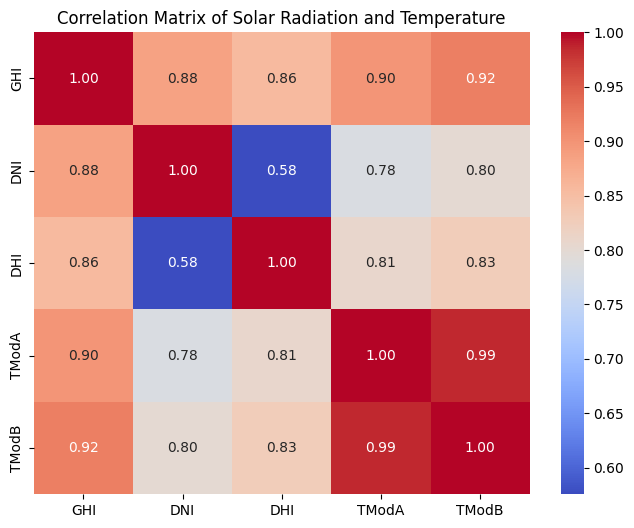

In [53]:
# Correlation matrix between solar radiation components and temperature measures
correlation_matrix = df_tg[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Solar Radiation and Temperature")
plt.show()

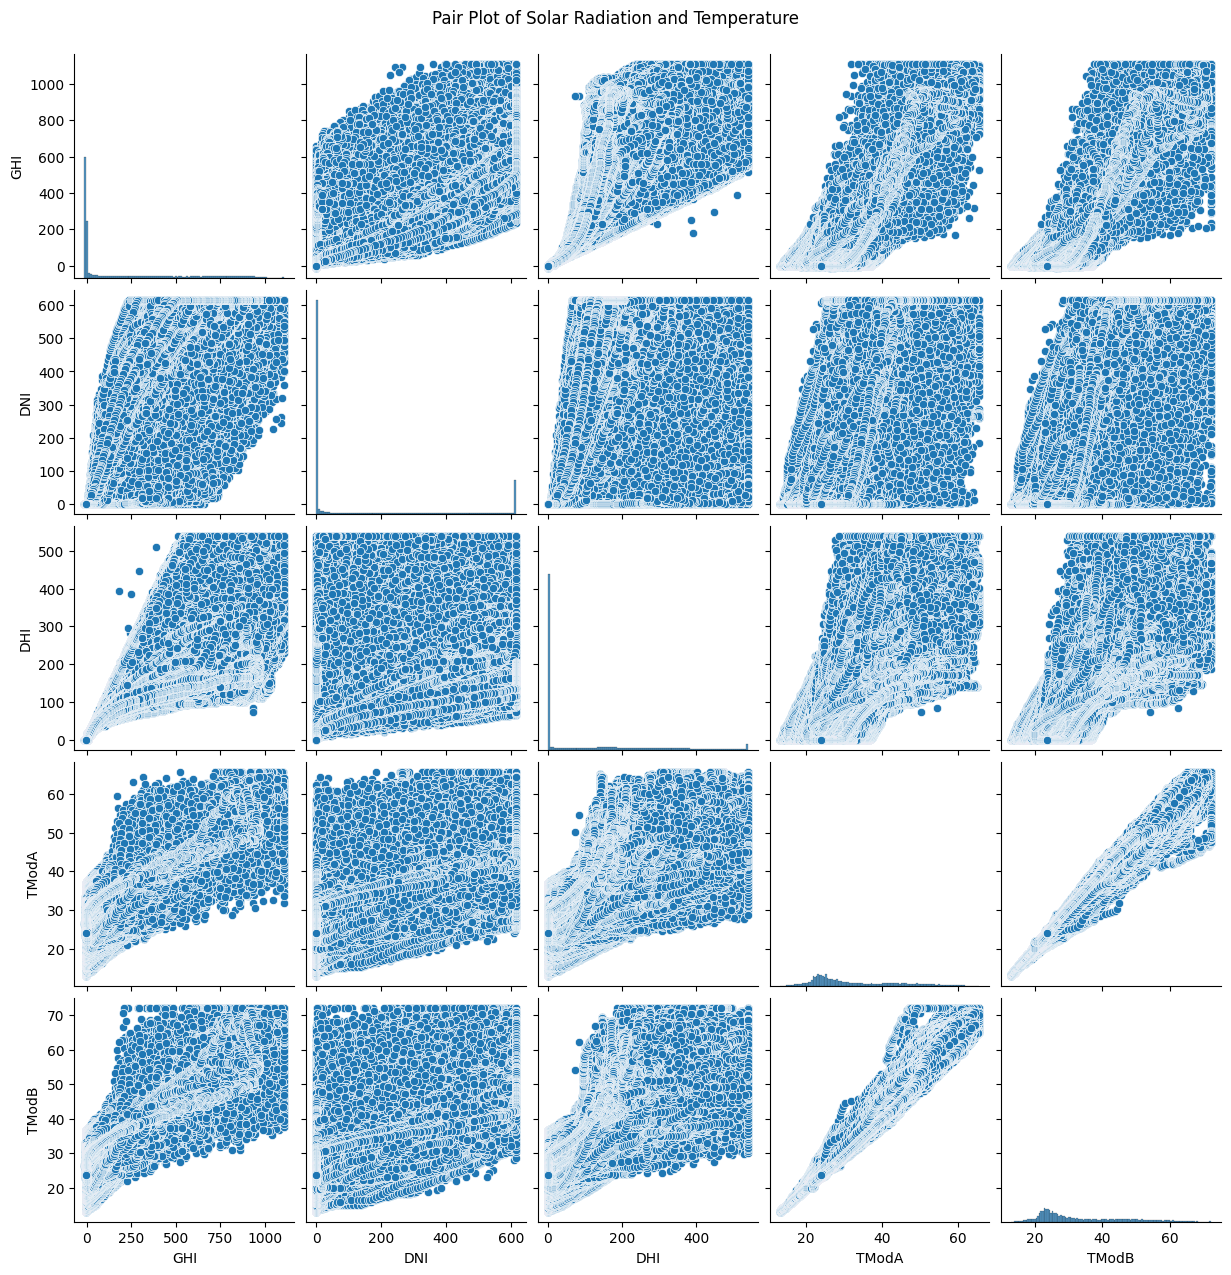

In [54]:
# Pair Plot between solar radiation components and temperature measures
sns.pairplot(df_tg[["GHI", "DNI", "DHI", "TModA", "TModB"]])
plt.suptitle("Pair Plot of Solar Radiation and Temperature", y=1.02)
plt.show()

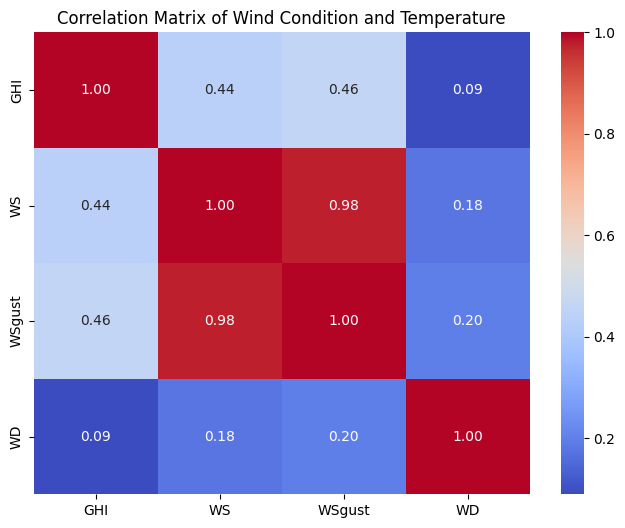

In [55]:
# Correlation matrix between wind condition components and temperature measures
correlation_matrix = df_tg[["GHI", "WS", "WSgust", "WD"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Wind Condition and Temperature")
plt.show()

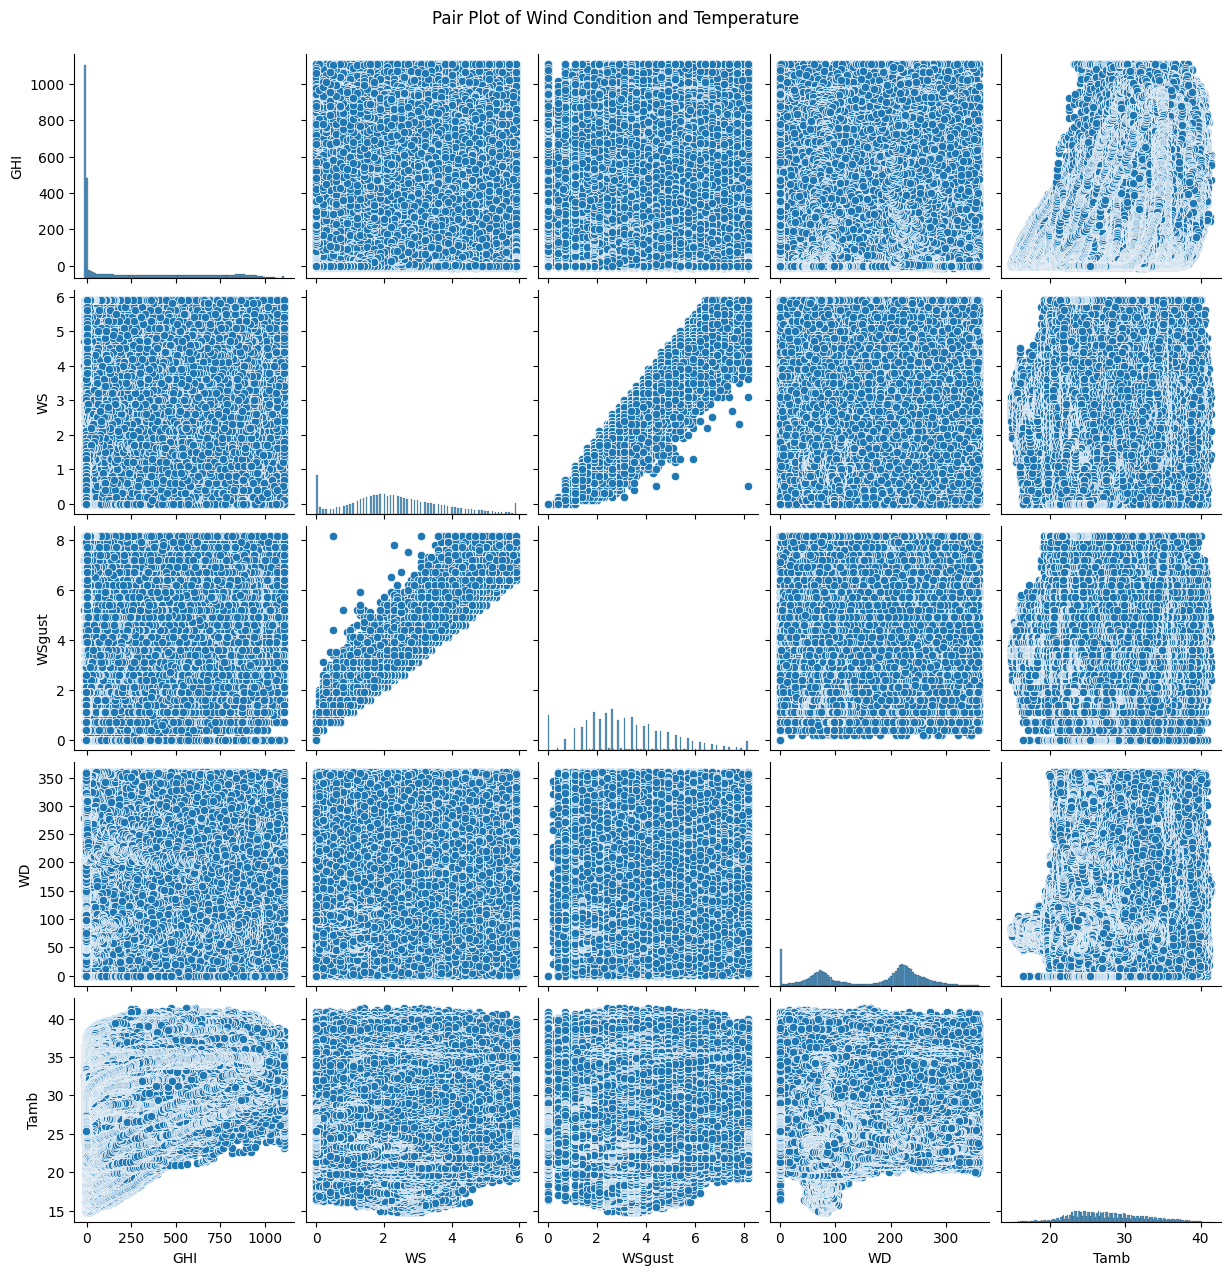

In [56]:
# Pair Plot between wind conditions components and temperature measures
sns.pairplot(df_tg[["GHI", "WS", "WSgust", "WD", "Tamb"]])
plt.suptitle("Pair Plot of Wind Condition and Temperature", y=1.02)
plt.show()

Observations:
- There are no observable correlation between tempreture and wind conditions

## Wind Analysis

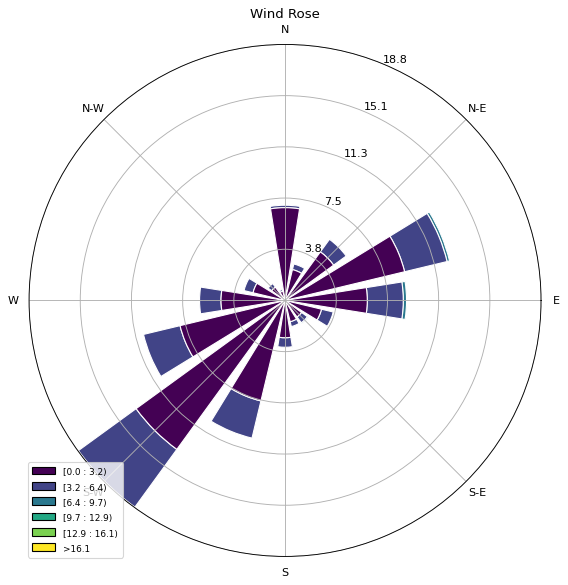

In [57]:
# Wind Analysis using wind roses
ax = WindroseAxes.from_ax()
ax.bar(df_tg_cleaned["WD"], df_tg_cleaned["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.title("Wind Rose")
plt.show()

## Temperature Analysis

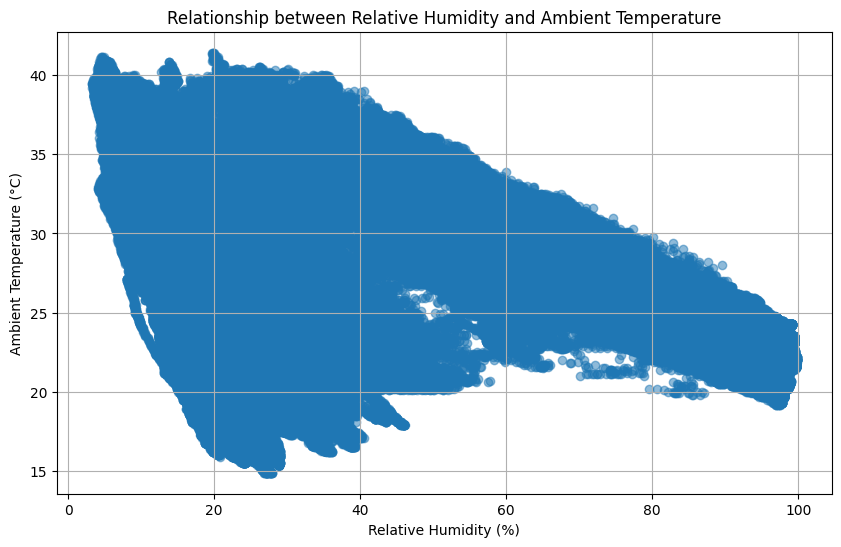

Correlation between Ambient Temperature and Relative Humidity: -0.4004104673516292


In [58]:
# scatter plot of ambient temperature vs. relative humidity
plt.figure(figsize=(10, 6))
plt.scatter(df_tg["RH"], df_tg["Tamb"], alpha=0.5)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("Relationship between Relative Humidity and Ambient Temperature")
plt.grid(True)
plt.show()

# the pearson correlation between 'Tamb' and 'RH'
correlation = df_tg["Tamb"].corr(df_tg["RH"])
print(f"Correlation between Ambient Temperature and Relative Humidity: {correlation}")

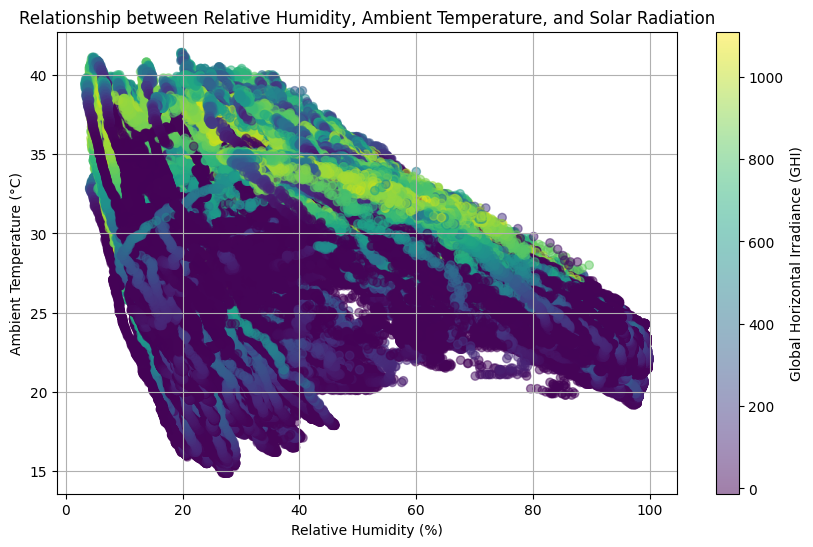

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_tg["RH"], df_tg["Tamb"], c=df_tg["GHI"], cmap="viridis", alpha=0.5
)  #'GHI' is the solar radiation data
plt.colorbar(label="Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title(
    "Relationship between Relative Humidity, Ambient Temperature, and Solar Radiation"
)
plt.grid(True)
plt.show()

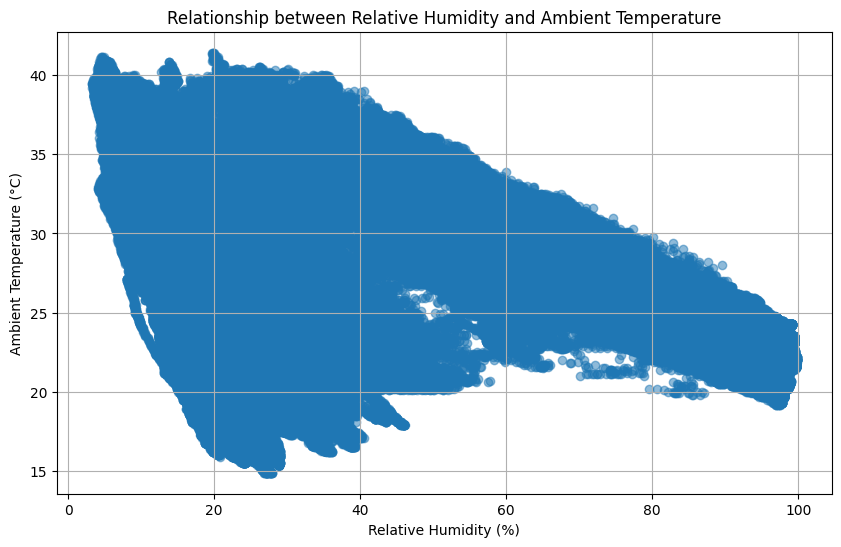

Correlation between Ambient Temperature and Relative Humidity: -0.4004104673516292


In [60]:
# Create a scatter plot of 'Tamb' (ambient temperature) vs. 'RH' (relative humidity)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_tg["RH"], df_tg["Tamb"], alpha=0.5
)  # Use alpha for better visualization if many points overlap
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("Relationship between Relative Humidity and Ambient Temperature")
plt.grid(True)
plt.show()

# Calculate the correlation between 'Tamb' and 'RH'
correlation = df_tg["Tamb"].corr(df_tg["RH"])
print(f"Correlation between Ambient Temperature and Relative Humidity: {correlation}")

## Z-Score Analysis

In [61]:
# Calculate Z-scores for each numeric column
columns = [
    "GHI",
    "DNI",
    "DHI",
    "ModA",
    "ModB",
    "Tamb",
    "RH",
    "WS",
    "WSgust",
    "WD",
    "BP",
    "Cleaning",
    "Precipitation",
    "TModA",
    "TModB",
]
outlier_columns = [f"{col}_zscore" for col in columns]
df_outliers = pd.DataFrame(columns=outlier_columns, index=df_tg.index)


for col in columns:
    df_outliers[f"{col}_zscore"] = np.abs((df_tg[col] - df_tg[col].mean()) / df_tg[col].std())
df_outliers.head(2)

GHI_zscore  DNI_zscore  DHI_zscore  ModA_zscore  \
Timestamp                                                              
2021-10-25 00:01:00    0.719362    0.623603    0.749673     0.713026   
2021-10-25 00:02:00    0.719362    0.623603    0.749673     0.713026   

                     ModB_zscore  Tamb_zscore  RH_zscore  WS_zscore  \
Timestamp                                                             
2021-10-25 00:01:00     0.713593     0.620381   1.372084   1.030697   
2021-10-25 00:02:00     0.713593     0.620381   1.368609   0.888654   

                     WSgust_zscore  WD_zscore  BP_zscore  Cleaning_zscore  \
Timestamp                                                                   
2021-10-25 00:01:00       1.162088   0.716806   0.516539         0.023128   
2021-10-25 00:02:00       0.886852   0.735309   0.516539         0.023128   

                     Precipitation_zscore  TModA_zscore  TModB_zscore  
Timestamp                                                              
2021-10-25 00:01:00                   NaN      0.704186      0.716919  
2021-10-25 00:02:00                   NaN      0.704186      0.716919

In [62]:
# Threshold for flagging outliers
threshold = 2

# Identify outliers
outliers = df_outliers[
    df_outliers[[f"{col}" for col in df_outliers.columns]].any(axis=1) > threshold
]

print("Outliers based on Z-score:")
outliers

Outliers based on Z-score:


Empty DataFrame
Columns: [GHI_zscore, DNI_zscore, DHI_zscore, ModA_zscore, ModB_zscore, Tamb_zscore, RH_zscore, WS_zscore, WSgust_zscore, WD_zscore, BP_zscore, Cleaning_zscore, Precipitation_zscore, TModA_zscore, TModB_zscore]
Index: []

Observations:
- Since we already cleaned the outliers using inter-quartile range method, the z-score didn't find any outlier.

## Temperature Analysis

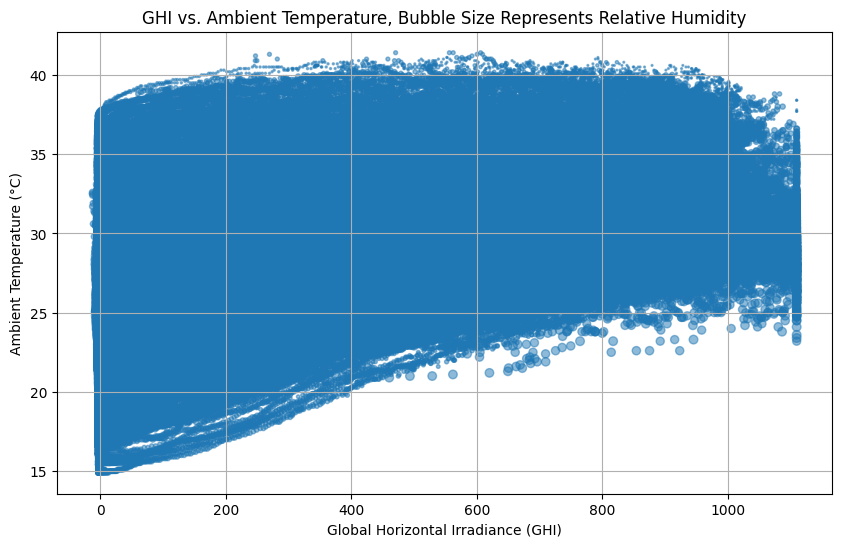

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_tg["GHI"], df_tg["Tamb"], s=df_tg["RH"] * 0.4, alpha=0.5
)  # adjust the 0.1 for size if needed
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs. Ambient Temperature, Bubble Size Represents Relative Humidity")
plt.grid(True)
plt.show()

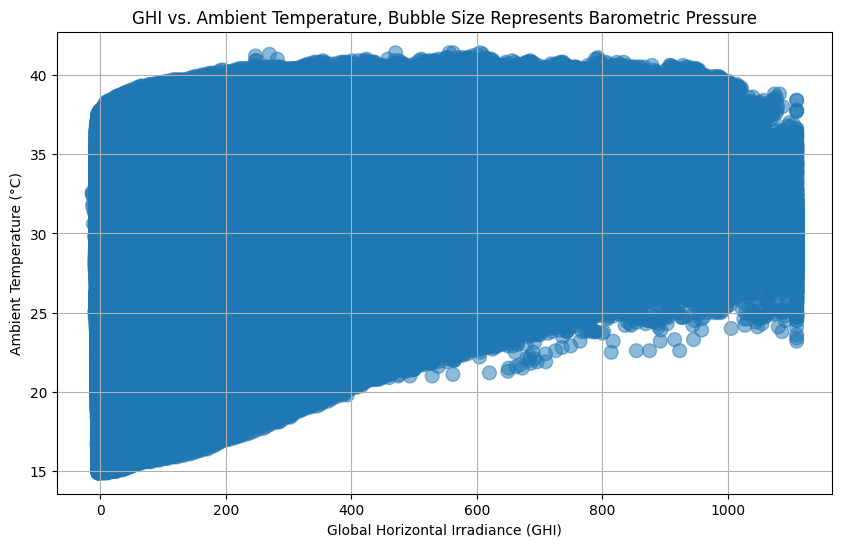

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tg["GHI"], df_tg["Tamb"], s=df_tg["BP"] * 0.1, alpha=0.5)
plt.xlabel("Global Horizontal Irradiance (GHI)")
plt.ylabel("Ambient Temperature (°C)")
plt.title("GHI vs. Ambient Temperature, Bubble Size Represents Barometric Pressure")
plt.grid(True)
plt.show()